In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Data_file.csv')

In [3]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [4]:
date = pd.to_datetime(df['pdate'])

In [5]:
df['Month'] = date.dt.month_name(locale = 'English')

In [6]:
df['Day_name'] = date.dt.day_name()

In [7]:
No_of_days = []
from datetime import datetime
date_format = "%Y/%m/%d"
for i in df['pdate']:
    No_of_days.append(((datetime.strptime(i, "%Y-%m-%d")) - (datetime.strptime('2016-06-01',"%Y-%m-%d"))).days)

In [8]:
df['No_of_days'] = No_of_days

In [9]:
df.shape

(209593, 40)

In [10]:
df1 = df.drop(['Unnamed: 0','msisdn','pcircle','pdate'],axis=1)

In [11]:
df1.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90   Month   Day_name  No_of_days  
0                 0.0  29.000000  29.000000    July  Wednesday          49  
1                 0.0   0.000000   0.000000  August  Wednesday          70  
2                 0.0   0.000000   0.000000  August     Friday          79  
3                 0.0   0.000000   0.000000    June     Monday           5  
4                 0.0   2.333333   2.333333    June  Wednesday          21  

[5 rows x 36 columns]

In [12]:
df1.shape

(209593, 36)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [14]:
category = ['Month','Day_name']
lab = LabelEncoder()
for i in category:
    df1[i] = lab.fit_transform(df1[i])

print(df1.dtypes)

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [15]:
df1.iloc[:,:-3].head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0            2            12              6.0                 0.0   
1            1            12             12.0                 0.0   
2            1             6              6.0                 0.0   
3            2            12              6.0                 0.0   
4            7            42              6.0                 0.0   

   cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          2.0            12                6                 0.0  29.000000   
1          1.0            12               12                 0.0   0.000000   
2          1.0             6                6                 0.0   0.000000   
3          2.0            12                6                 0.0   0.000000   
4          7.0            42                6                 0.0   2.333333   

   payback90  
0  29.000000  
1   0.000000  
2   0.000000  
3   0.000000  
4   2.333333  

[5 rows x 33 columns]

In [122]:
label_0 = df5[df5['label'] == 0]

In [130]:
label0 = []
for i in label_0.columns:
    label0.append(label_0[i].mean())

In [131]:
col = df5.columns

In [126]:
label_1 = df5[df5['label'] == 1]

In [127]:
label1 = []
for i in label_0.columns:
    label1.append(i,label_1[i].mean())

In [135]:
Comparison = pd.DataFrame(zip(col,label0,label1),columns=('Features','Customer who not paid','Customer who paid'))

In [137]:
Comparison

Features  Customer who not paid  Customer who paid
0                  label               0.000000           1.000000
1                    aon             561.100634         674.132159
2           daily_decr30            1296.169239        5918.778737
3           daily_decr90            1302.773020        6639.236966
4               rental30            2070.105600        2875.808060
5               rental90            2377.271068        3763.293114
6      last_rech_date_ma               8.432867           5.822581
7      last_rech_date_da               0.470430           1.001578
8       last_rech_amt_ma            1237.045830        2182.462408
9          cnt_ma_rech30               1.303417           4.359530
10          fr_ma_rech30               1.836297           4.189315
11     sumamnt_ma_rech30            2249.502752        8366.892153
12  medianamnt_ma_rech30            1036.941900        1923.430522
13  medianmarechprebal30              50.533788         102.752632
14         cnt_ma_rech90               1.812744           6.957630
15          fr_ma_rech90               4.903601           8.118012
16     sumamnt_ma_rech90            3168.424540       13015.550835
17  medianamnt_ma_rech90            1198.404633        1959.565804
18  medianmarechprebal90              56.556663          98.994387
19         cnt_da_rech30             220.175331         268.622970
20          fr_da_rech30               0.024584           0.017106
21         cnt_da_rech90               0.038338           0.041945
22          fr_da_rech90               0.059361           0.043766
23           cnt_loans30               1.431313           2.948340
24          amnt_loans30               8.873634          19.246834
25       maxamnt_loans30             271.871264         275.053437
26    medianamnt_loans30               0.019876           0.040975
27           cnt_loans90              15.701208          18.920264
28          amnt_loans90               9.642382          25.642590
29       maxamnt_loans90               6.234386           6.769990
30    medianamnt_loans90               0.018538           0.034503
31             payback30               2.227276           3.375558
32             payback90               2.926038           4.297736
33                 Month               1.506880           1.159292
34              Day_name               2.973358           3.007878
35            No_of_days              28.040020          38.863687

In [16]:
df3 = df1.iloc[:,:-3]

In [17]:
for i in df3.columns:
    df3[i] = df3[i].astype(int)

In [18]:
for i in df3.columns:
    df3[i] = df3[i].apply(lambda x: 'Data wrong' if x <0 or x>100000 else x)

In [19]:
df4 = pd.concat([df3,df1.iloc[:,-3:]],axis=1)

In [20]:
df5 = df4.replace('Data wrong',np.nan)

In [21]:
df5.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0        3055.0        3065.0     220.0     260.0   
1      1  712.0       12122.0       12124.0    3691.0    3691.0   
2      1  535.0        1398.0        1398.0     900.0     900.0   
3      1  241.0          21.0          21.0     159.0     159.0   
4      1  947.0         150.0         150.0    1098.0    1098.0   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                   0            2            12                6   
1                   0            1            12               12   
2                   0            1             6                6   
3                   0            2            12                6   
4                   0            7            42                6   

   medianamnt_loans90  payback30  payback90  Month  Day_name  No_of_days  
0                   0         29         29      1         6          49  
1                   0          0          0      0         6          70  
2                   0          0          0      0         0          79  
3                   0          0          0      2         1           5  
4                   0          2          2      2         6          21  

[5 rows x 36 columns]

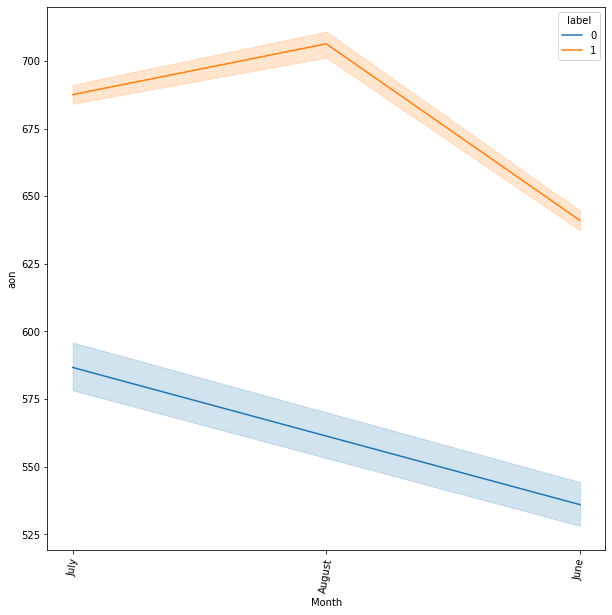

In [36]:
plt.figure(figsize=(10,10))
sns.lineplot(y="aon", x='Month',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

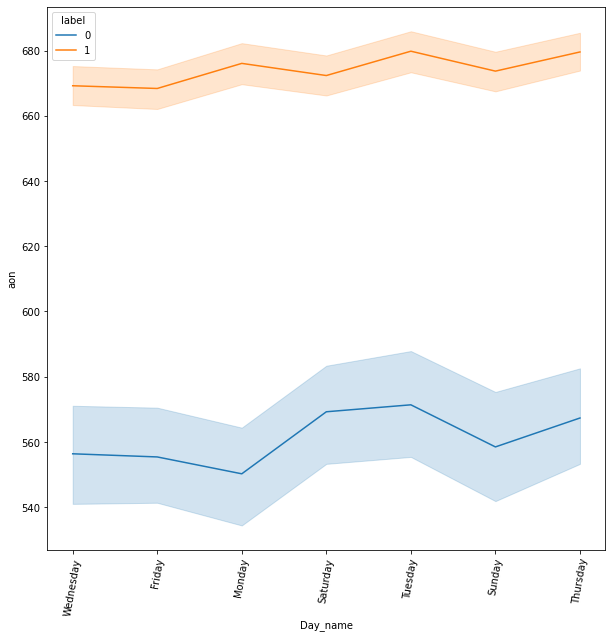

In [35]:
plt.figure(figsize=(10,10))
sns.lineplot(y="aon", x='Day_name',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

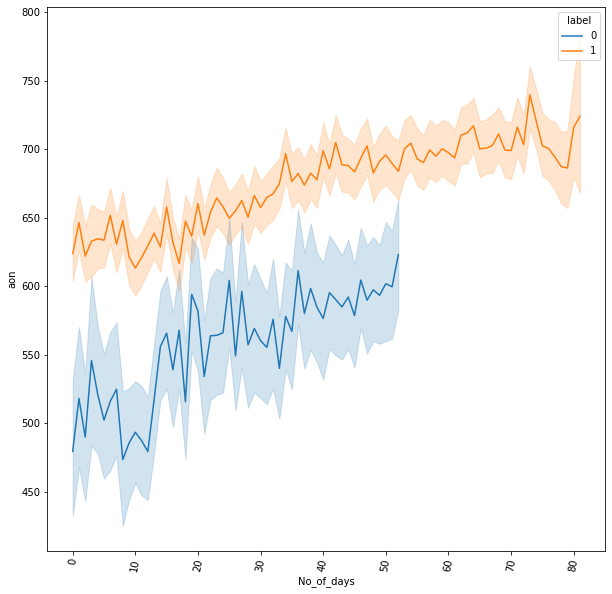

In [31]:
plt.figure(figsize=(10,10))
sns.lineplot(y="aon", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

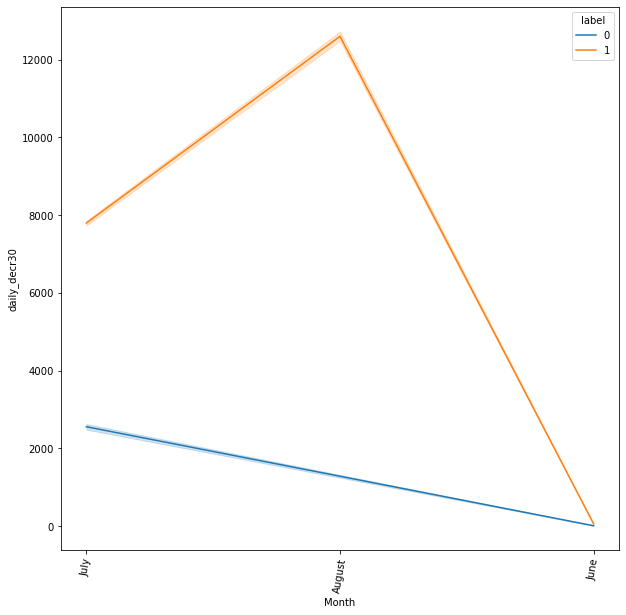

In [33]:
plt.figure(figsize=(10,10))
sns.lineplot(y="daily_decr30", x='Month',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

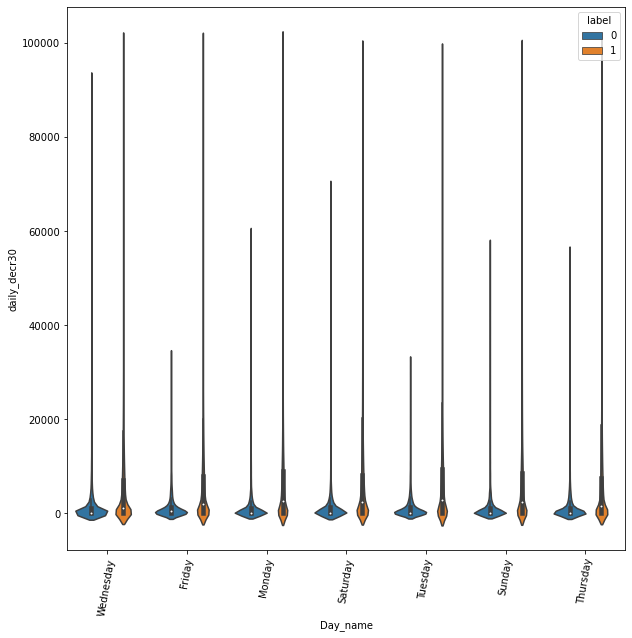

In [42]:
plt.figure(figsize=(10,10))
sns.violinplot(y="daily_decr30", x='Day_name',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

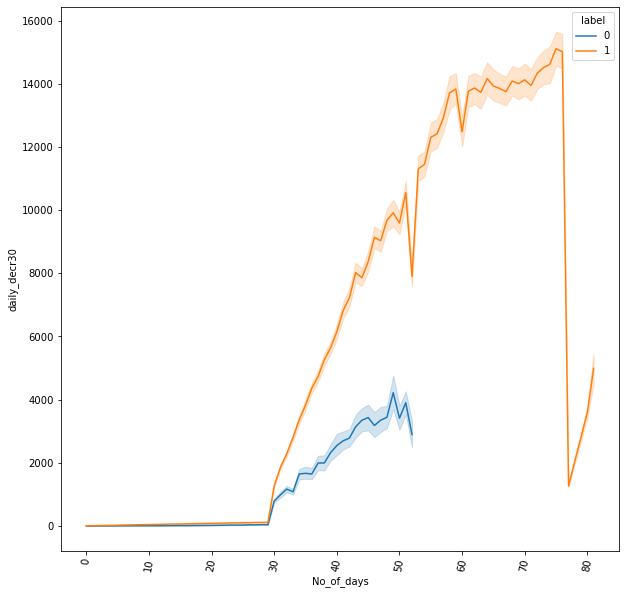

In [37]:
plt.figure(figsize=(10,10))
sns.lineplot(y="daily_decr30", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

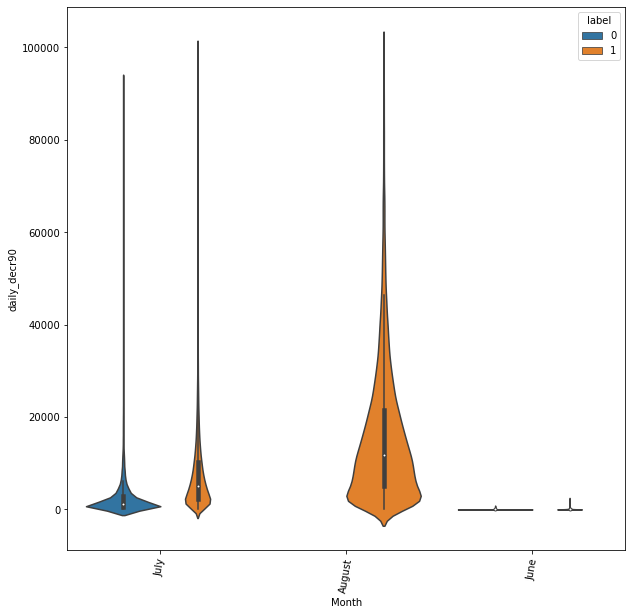

In [39]:
plt.figure(figsize=(10,10))
sns.violinplot(y="daily_decr90", x='Month',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

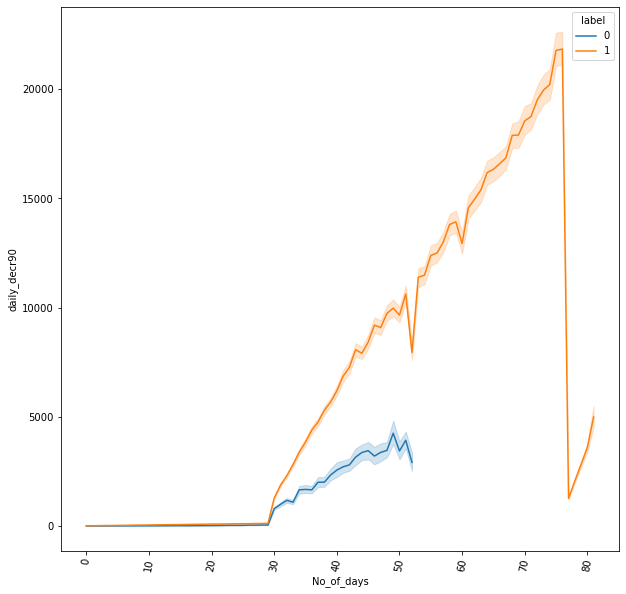

In [45]:
plt.figure(figsize=(10,10))
sns.lineplot(y="daily_decr90", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

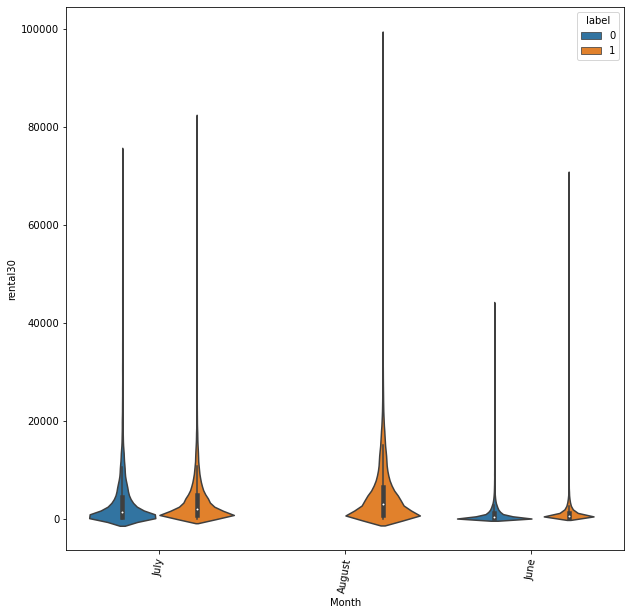

In [48]:
plt.figure(figsize=(10,10))
sns.violinplot(y="rental30", x='Month',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

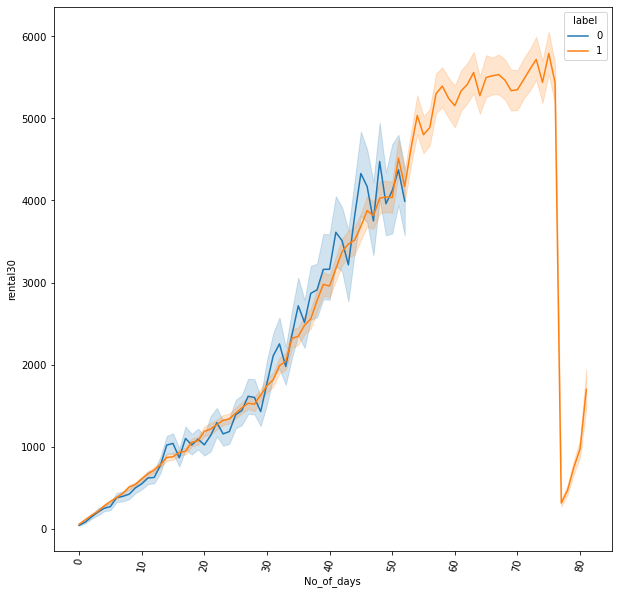

In [49]:
plt.figure(figsize=(10,10))
sns.lineplot(y="rental30", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

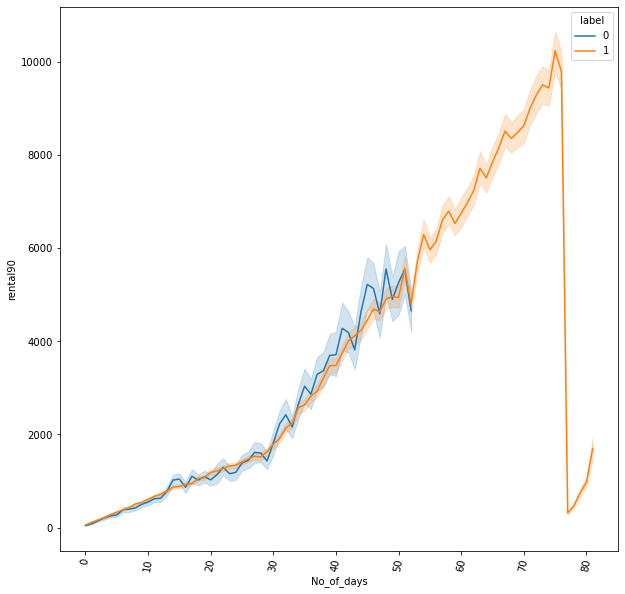

In [50]:
plt.figure(figsize=(10,10))
sns.lineplot(y="rental90", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

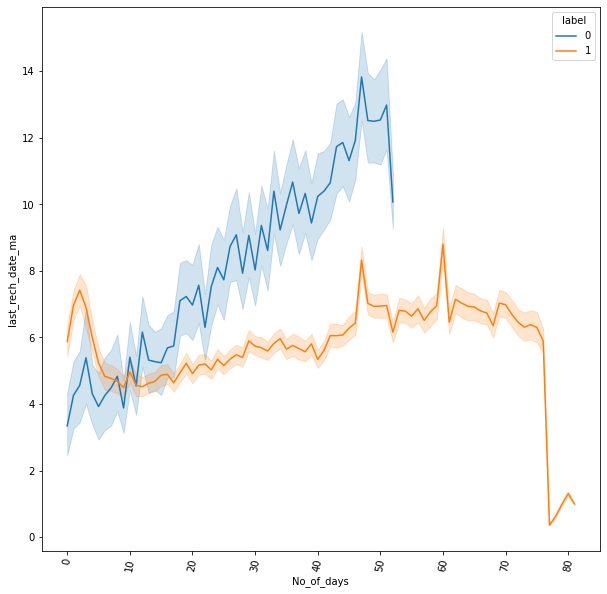

In [51]:
plt.figure(figsize=(10,10))
sns.lineplot(y="last_rech_date_ma", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

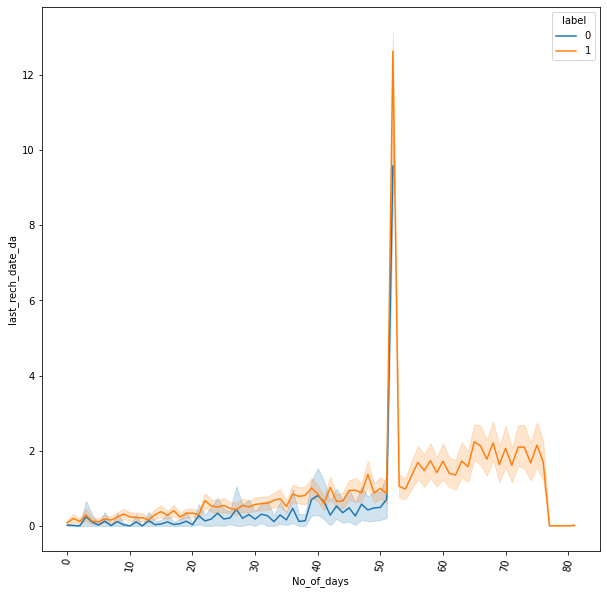

In [52]:
plt.figure(figsize=(10,10))
sns.lineplot(y="last_rech_date_da", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

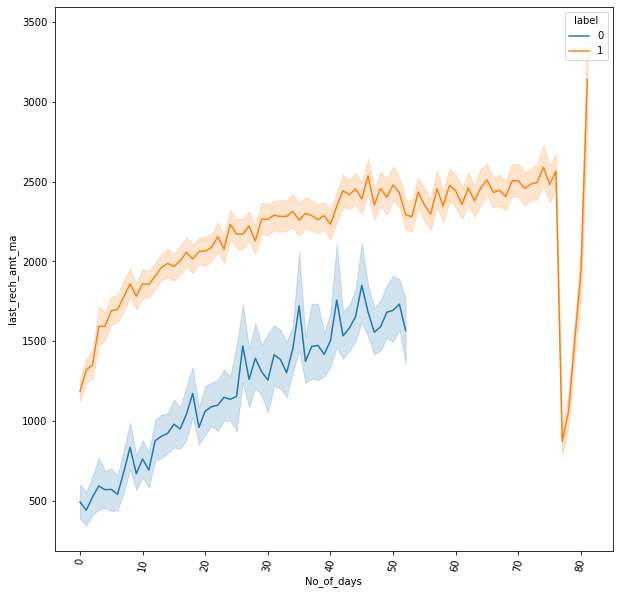

In [53]:
plt.figure(figsize=(10,10))
sns.lineplot(y="last_rech_amt_ma", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

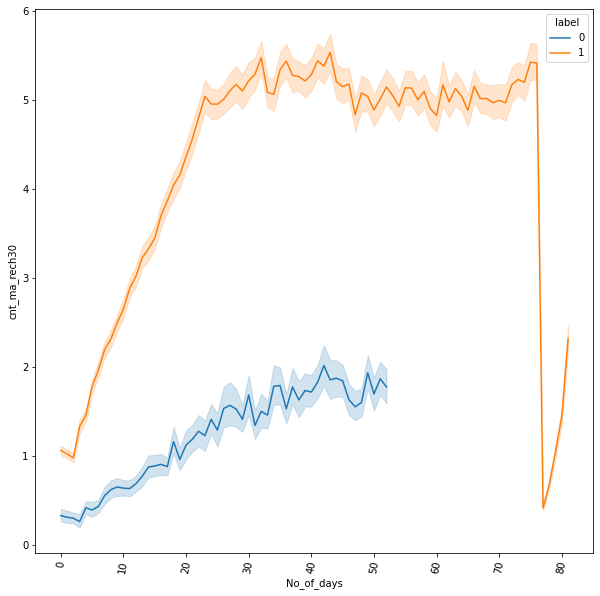

In [54]:
plt.figure(figsize=(10,10))
sns.lineplot(y="cnt_ma_rech30", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

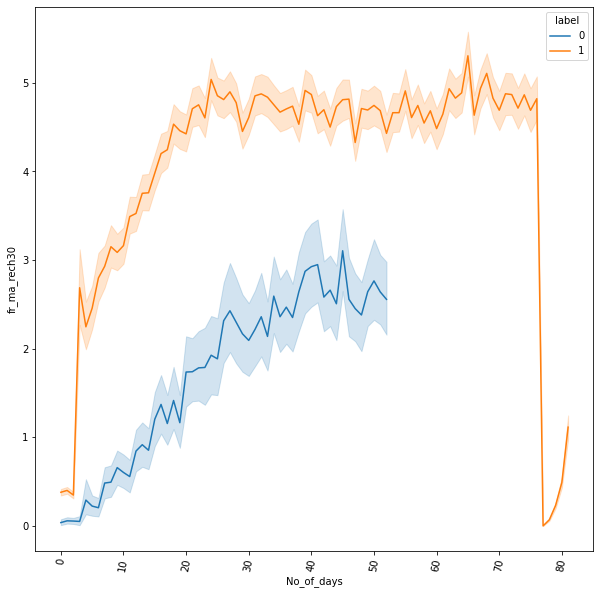

In [55]:
plt.figure(figsize=(10,10))
sns.lineplot(y="fr_ma_rech30", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

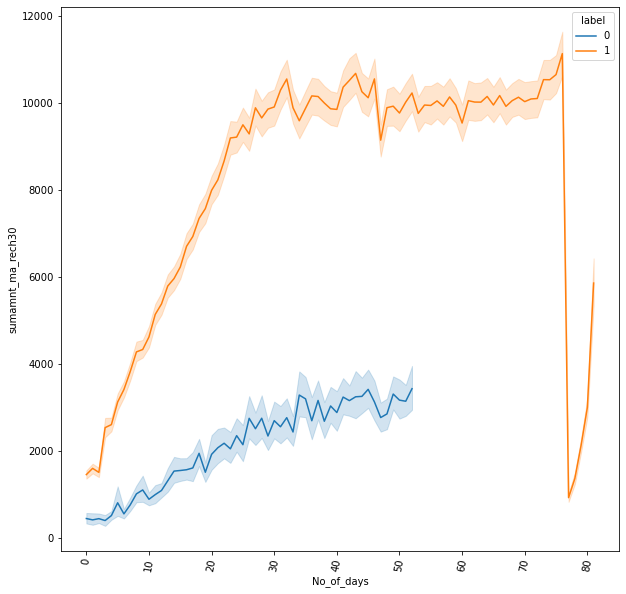

In [56]:
plt.figure(figsize=(10,10))
sns.lineplot(y="sumamnt_ma_rech30", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

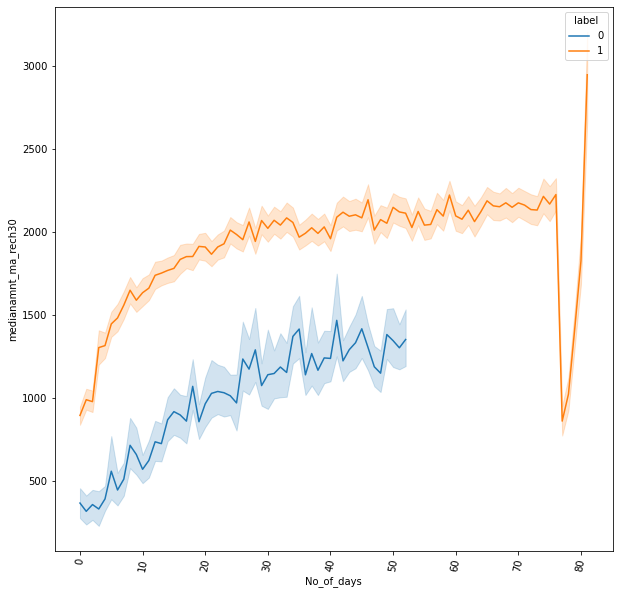

In [57]:
plt.figure(figsize=(10,10))
sns.lineplot(y="medianamnt_ma_rech30", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

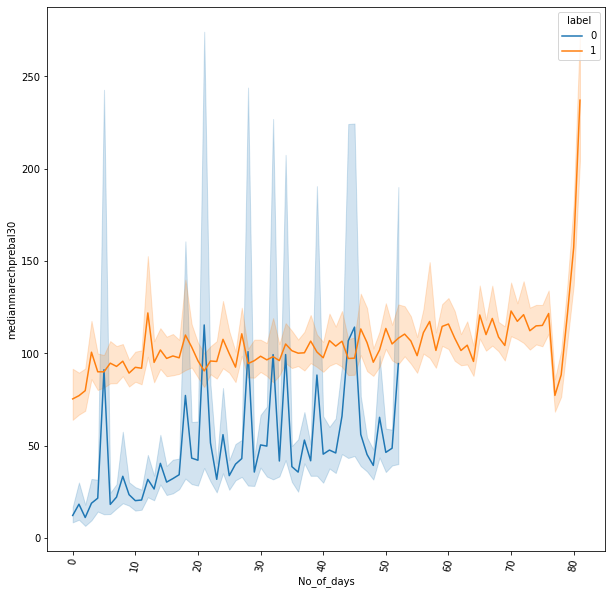

In [58]:
plt.figure(figsize=(10,10))
sns.lineplot(y="medianmarechprebal30", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

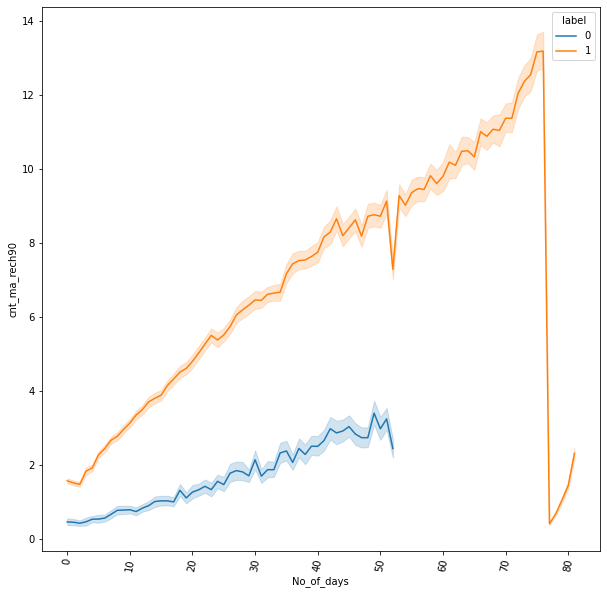

In [59]:
plt.figure(figsize=(10,10))
sns.lineplot(y="cnt_ma_rech90", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

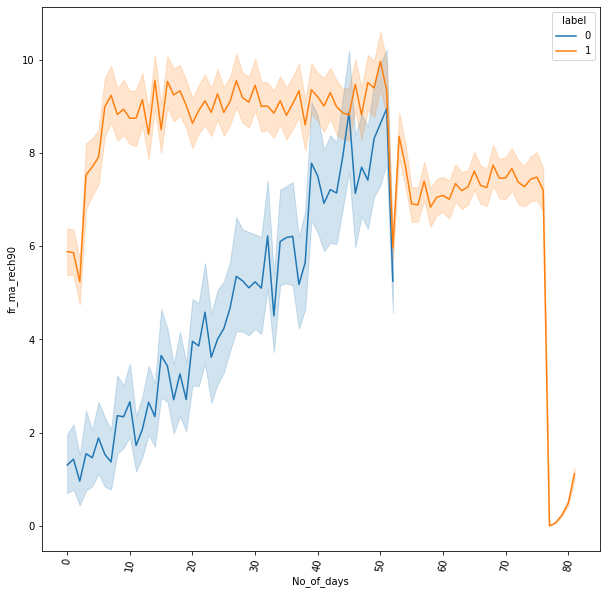

In [60]:
plt.figure(figsize=(10,10))
sns.lineplot(y="fr_ma_rech90", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

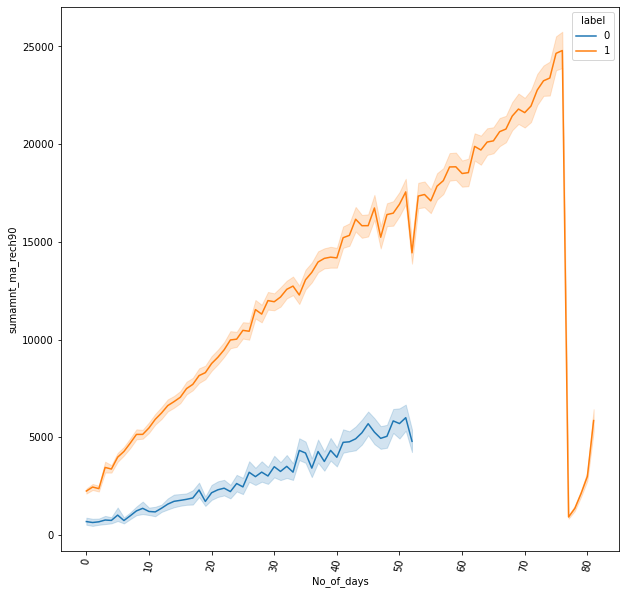

In [61]:
plt.figure(figsize=(10,10))
sns.lineplot(y="sumamnt_ma_rech90", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

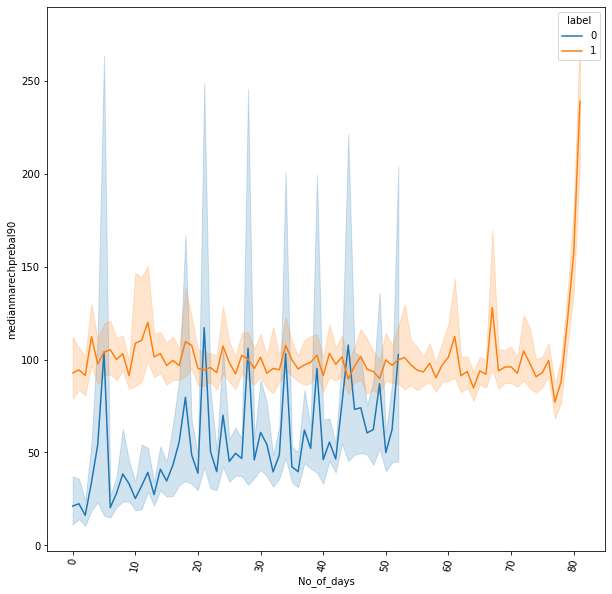

In [62]:
plt.figure(figsize=(10,10))
sns.lineplot(y="medianmarechprebal90", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

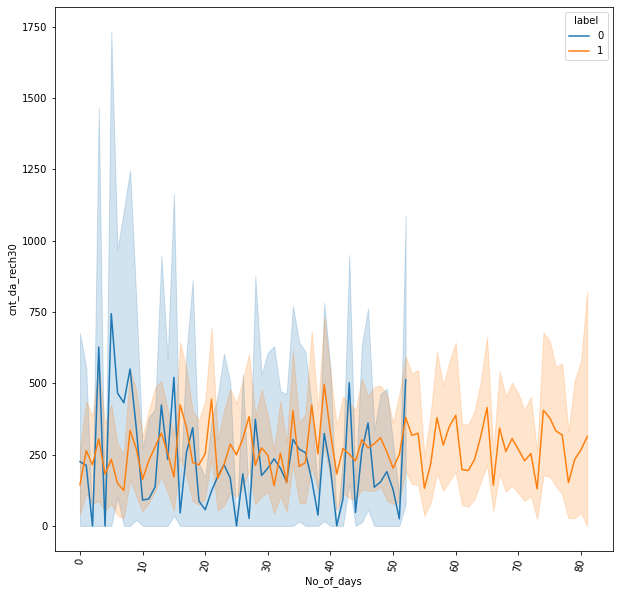

In [65]:
plt.figure(figsize=(10,10))
sns.lineplot(y="cnt_da_rech30", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

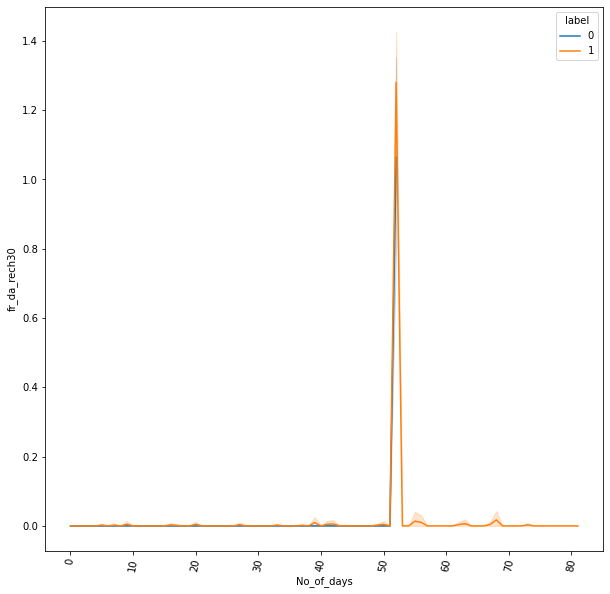

In [66]:
plt.figure(figsize=(10,10))
sns.lineplot(y="fr_da_rech30", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

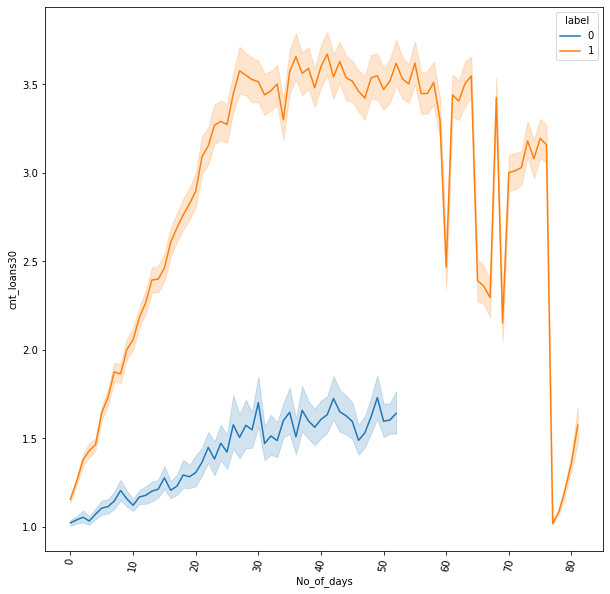

In [67]:
plt.figure(figsize=(10,10))
sns.lineplot(y="cnt_loans30", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

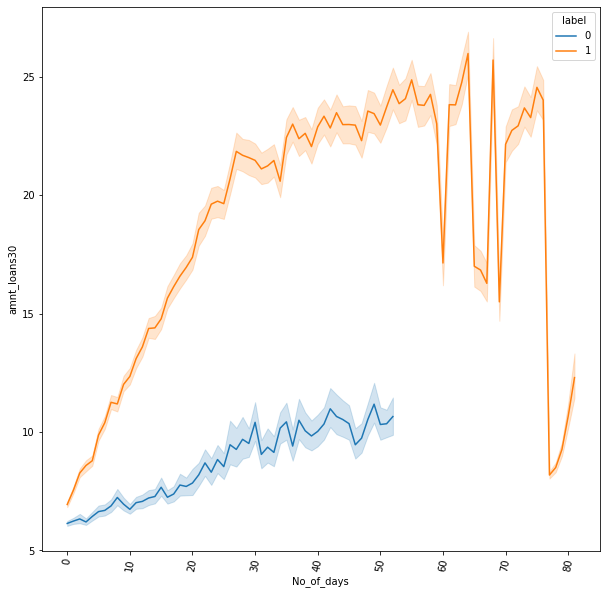

In [68]:
plt.figure(figsize=(10,10))
sns.lineplot(y="amnt_loans30", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

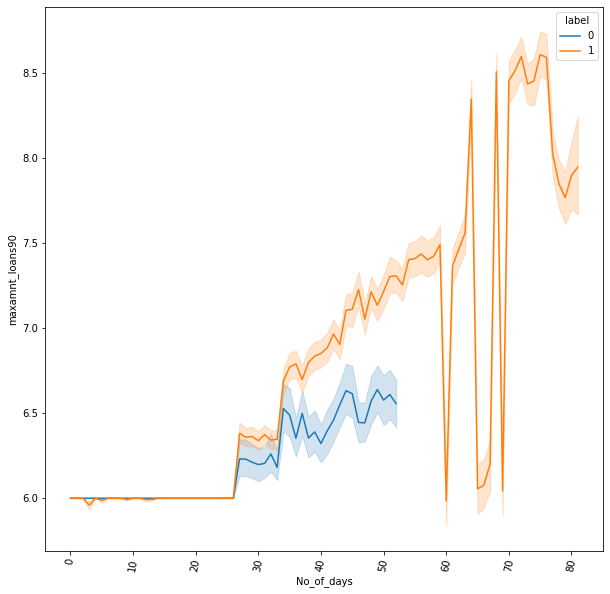

In [69]:
plt.figure(figsize=(10,10))
sns.lineplot(y="maxamnt_loans90", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

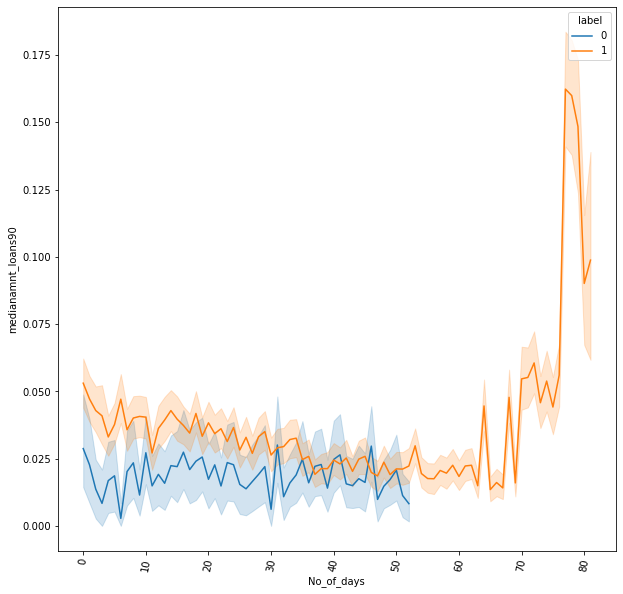

In [70]:
plt.figure(figsize=(10,10))
sns.lineplot(y="medianamnt_loans90", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

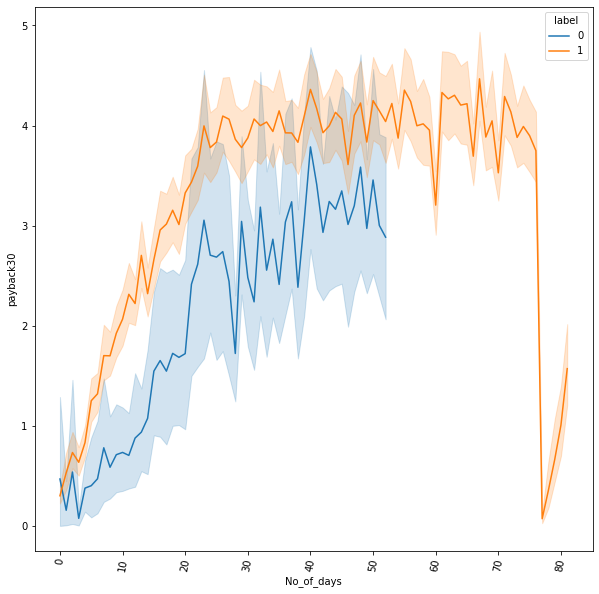

In [71]:
plt.figure(figsize=(10,10))
sns.lineplot(y="payback30", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

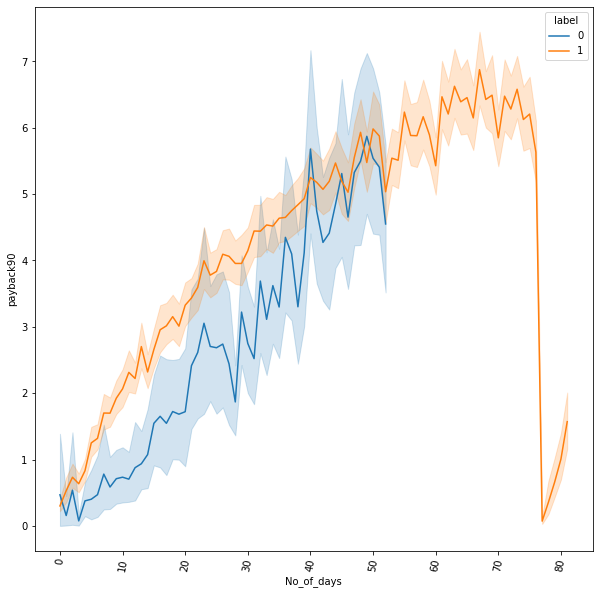

In [72]:
plt.figure(figsize=(10,10))
sns.lineplot(y="payback90", x='No_of_days',hue='label',data=df5)
plt.xticks(rotation=80)
plt.show()

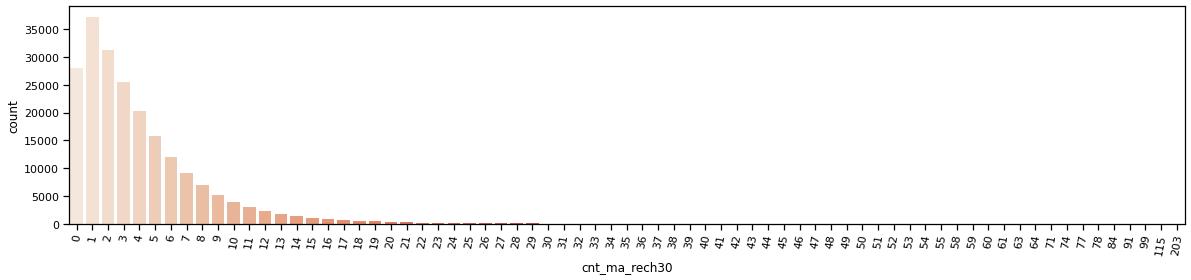

In [80]:
plt.figure(figsize=(20,4))
sns.countplot(x='cnt_ma_rech30',data=df5, palette='rocket_r')
sns.set_context('notebook')
plt.xticks(rotation=80)
plt.show()

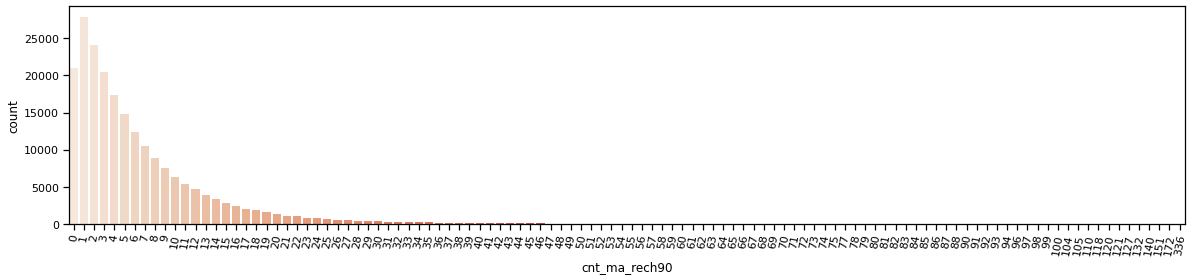

In [81]:
plt.figure(figsize=(20,4))
sns.countplot(x='cnt_ma_rech90',data=df5, palette='rocket_r')
sns.set_context('notebook')
plt.xticks(rotation=80)
plt.show()

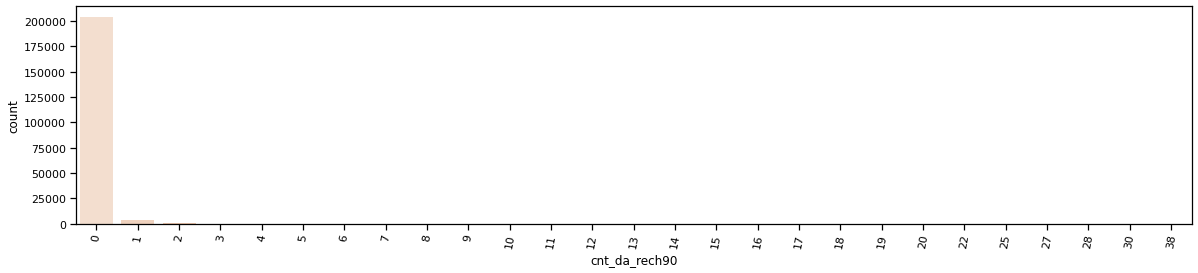

In [83]:
plt.figure(figsize=(20,4))
sns.countplot(x='cnt_da_rech90',data=df5, palette='rocket_r')
sns.set_context('notebook')
plt.xticks(rotation=80)
plt.show()

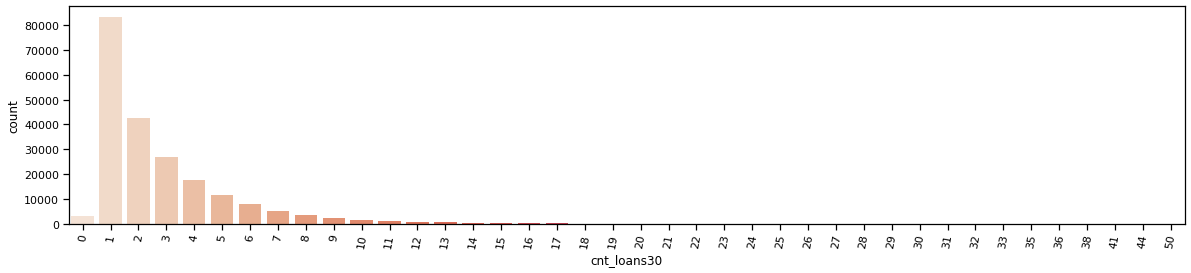

In [84]:
plt.figure(figsize=(20,4))
sns.countplot(x='cnt_loans30',data=df5, palette='rocket_r')
sns.set_context('notebook')
plt.xticks(rotation=80)
plt.show()

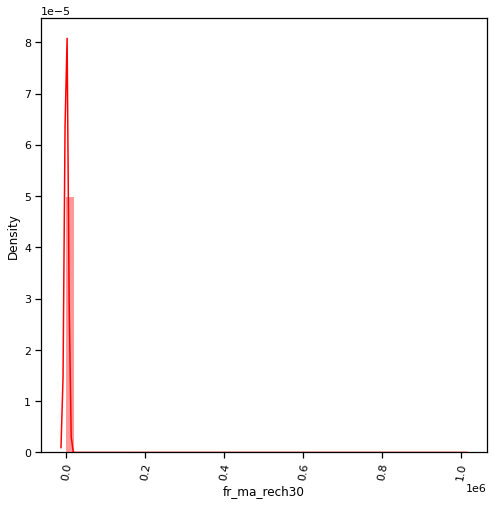

In [86]:
plt.figure(figsize=(8,8))
sns.distplot( df["fr_ma_rech30"] , color="red")
sns.set_context('notebook')
plt.xticks(rotation=80)
plt.show()

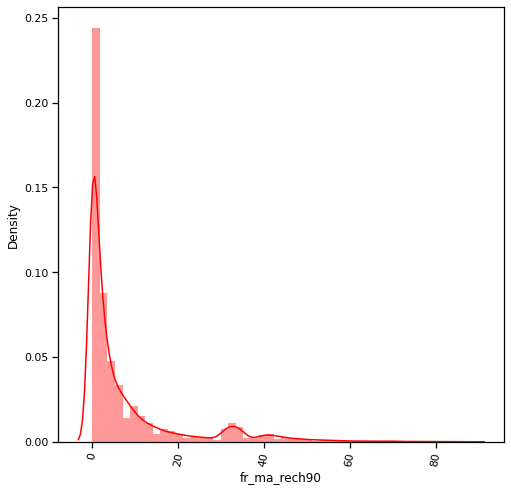

In [87]:
plt.figure(figsize=(8,8))
sns.distplot( df["fr_ma_rech90"] , color="red")
sns.set_context('notebook')
plt.xticks(rotation=80)
plt.show()

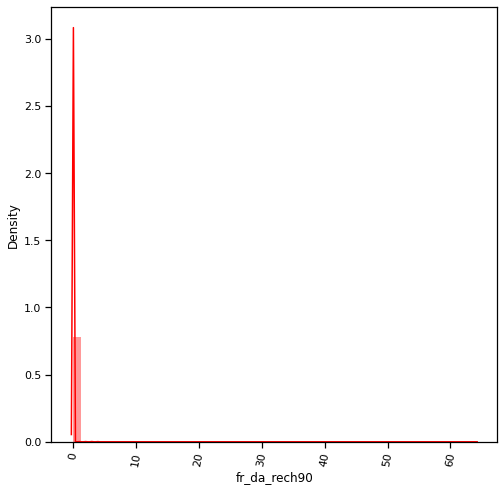

In [88]:
plt.figure(figsize=(8,8))
sns.distplot( df["fr_da_rech90"] , color="red")
sns.set_context('notebook')
plt.xticks(rotation=80)
plt.show()

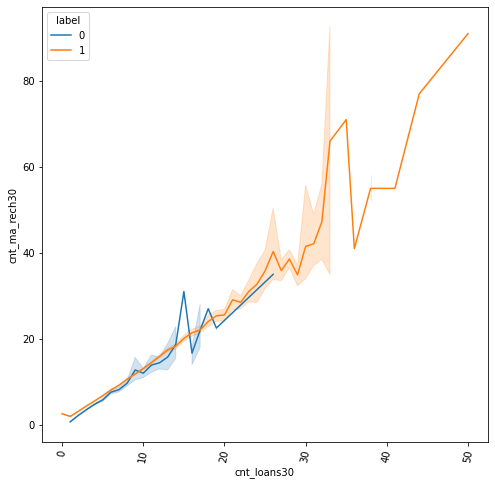

In [103]:
plt.figure(figsize=(8,8))
sns.lineplot(x="cnt_loans30", y='cnt_ma_rech30',data=df5,hue='label')
plt.xticks(rotation=80)
plt.show()

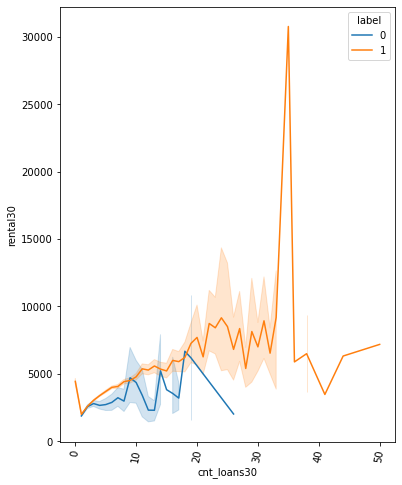

In [104]:
plt.figure(figsize=(6,8))
sns.lineplot(x="cnt_loans30", y='rental30',data=df5,hue='label')
plt.xticks(rotation=80)
plt.show()

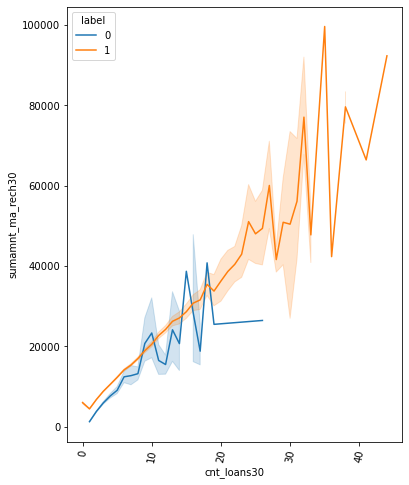

In [105]:
plt.figure(figsize=(6,8))
sns.lineplot(x="cnt_loans30", y='sumamnt_ma_rech30',data=df5,hue='label')
plt.xticks(rotation=80)
plt.show()

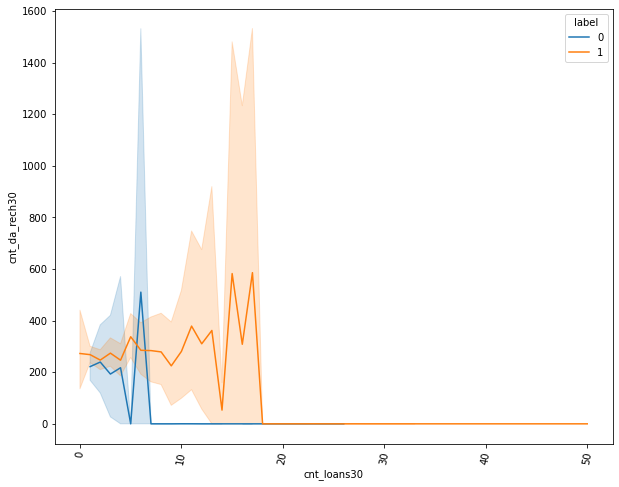

In [107]:
plt.figure(figsize=(10,8))
sns.lineplot(x="cnt_loans30", y='cnt_da_rech30',data=df5,hue='label')
plt.xticks(rotation=80)
plt.show()

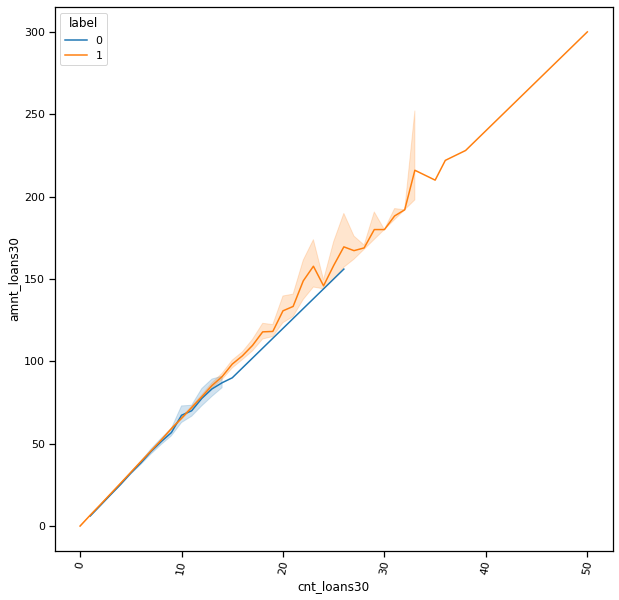

In [105]:
plt.figure(figsize=(10,10))
sns.lineplot(x="cnt_loans30", y='amnt_loans30',data=df5,hue='label')
plt.xticks(rotation=80)
plt.show()

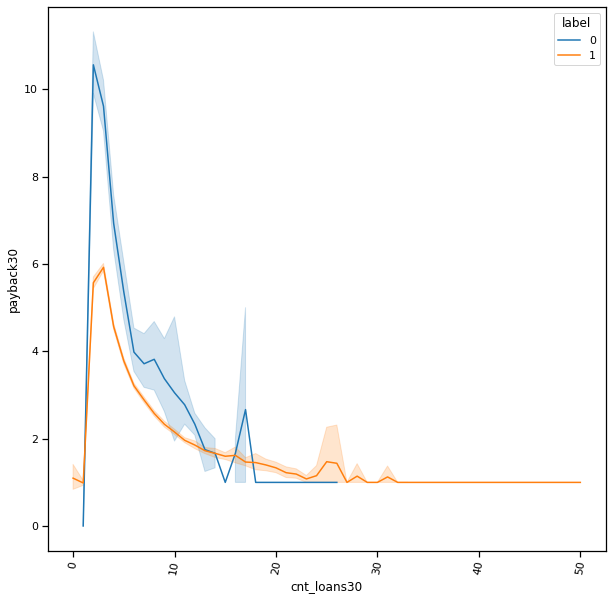

In [106]:
plt.figure(figsize=(10,10))
sns.lineplot(x="cnt_loans30", y='payback30',data=df5,hue='label')
plt.xticks(rotation=80)
plt.show()

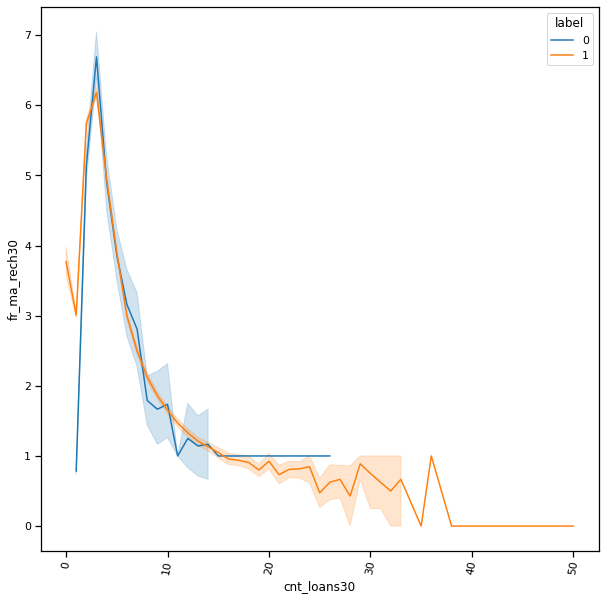

In [107]:
plt.figure(figsize=(10,10))
sns.lineplot(x="cnt_loans30", y='fr_ma_rech30',data=df5,hue='label')
plt.xticks(rotation=80)
plt.show()

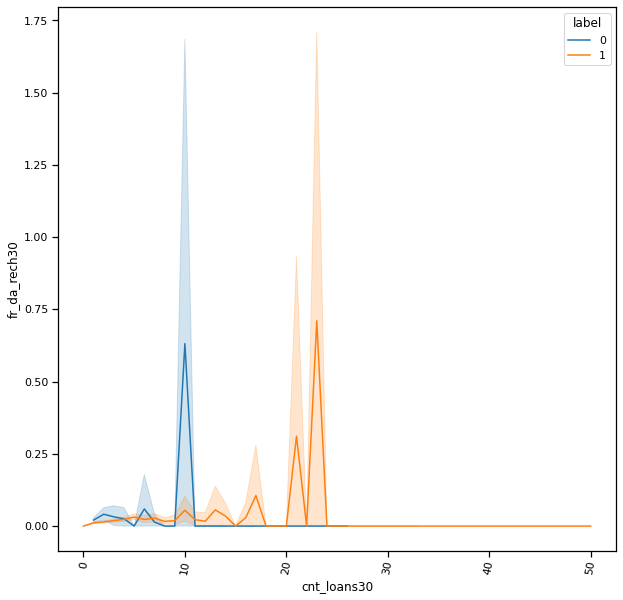

In [108]:
plt.figure(figsize=(10,10))
sns.lineplot(x="cnt_loans30", y='fr_da_rech30',data=df5,hue='label')
plt.xticks(rotation=80)
plt.show()

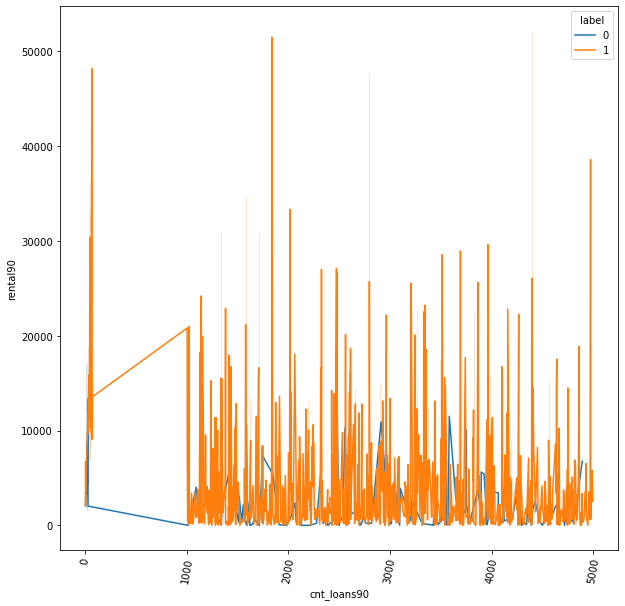

In [114]:
plt.figure(figsize=(10,10))
sns.lineplot(x="cnt_loans90", y='rental90',data=df5,hue='label')
plt.xticks(rotation=80)
plt.show()

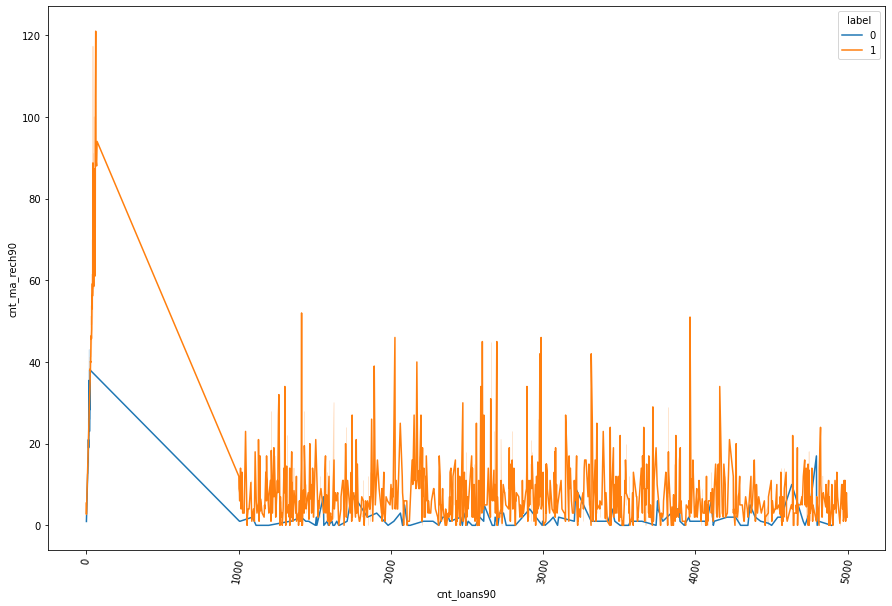

In [116]:
plt.figure(figsize=(15,10))
sns.lineplot(x="cnt_loans90", y='cnt_ma_rech90',data=df5,hue='label')
plt.xticks(rotation=80)
plt.show()

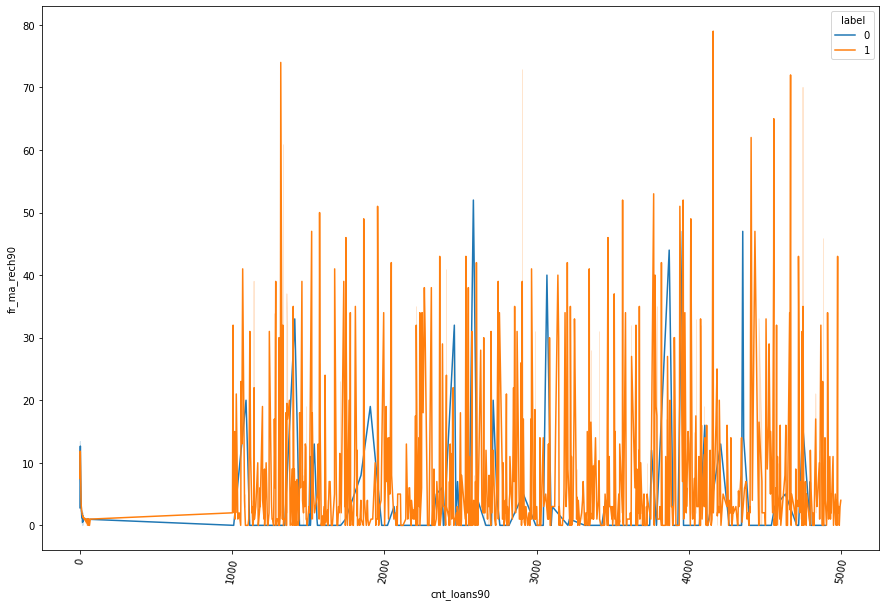

In [118]:
plt.figure(figsize=(15,10))
sns.lineplot(x="cnt_loans90", y='fr_ma_rech90',data=df5,hue='label')
plt.xticks(rotation=80)
plt.show()

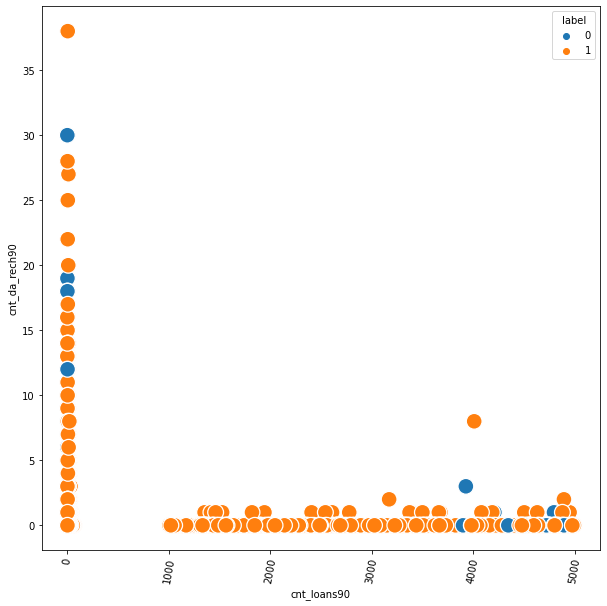

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="cnt_loans90", y='cnt_da_rech90',data=df5,hue='label',s=250)
plt.xticks(rotation=80)
plt.show()

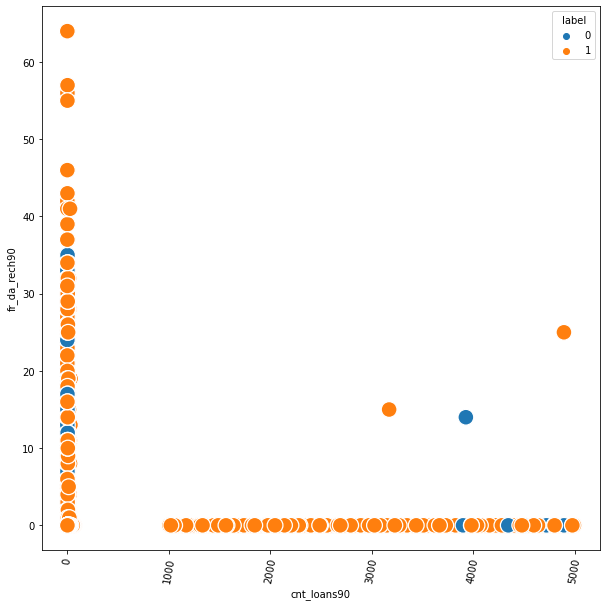

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="cnt_loans90", y='fr_da_rech90',data=df5,hue='label',s=250)
plt.xticks(rotation=80)
plt.show()

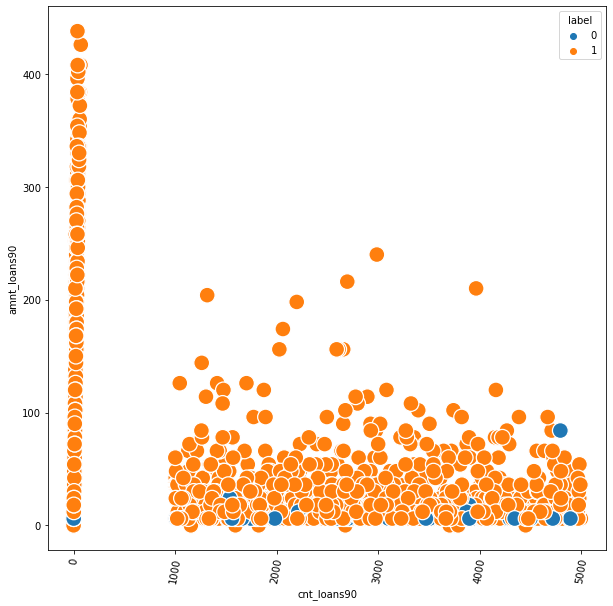

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="cnt_loans90", y='amnt_loans90',data=df5,hue='label',s=250)
plt.xticks(rotation=80)
plt.show()

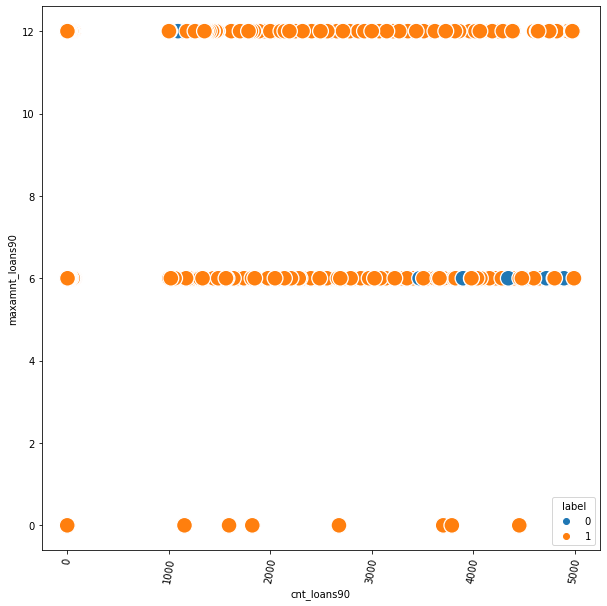

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="cnt_loans90", y='maxamnt_loans90',data=df5,hue='label',s=250)
plt.xticks(rotation=80)
plt.show()

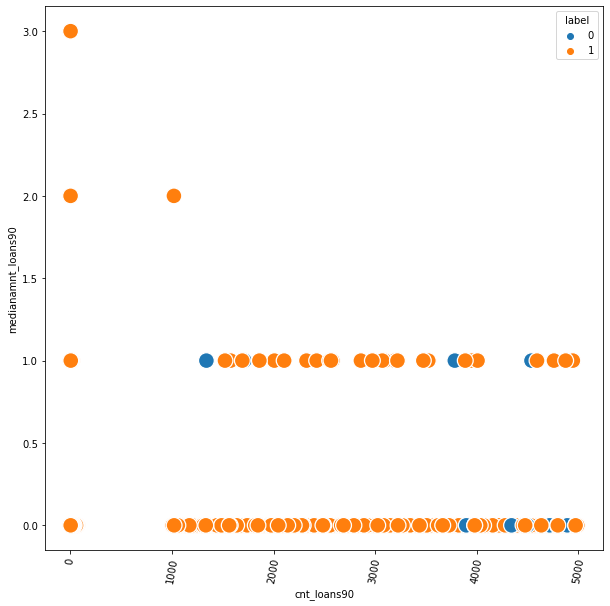

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="cnt_loans90", y='medianamnt_loans90',data=df5,hue='label',s=250)
plt.xticks(rotation=80)
plt.show()

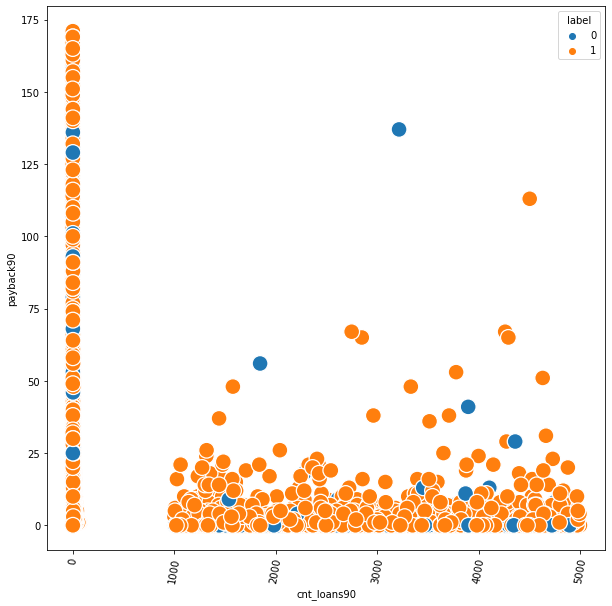

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="cnt_loans90", y='payback90',data=df5,hue='label',s=250)
plt.xticks(rotation=80)
plt.show()

In [25]:
[i for i in df5.columns if df5[i].isnull().sum()>0]

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianmarechprebal30',
 'sumamnt_ma_rech90',
 'medianmarechprebal90',
 'fr_da_rech30']

<AxesSubplot:>

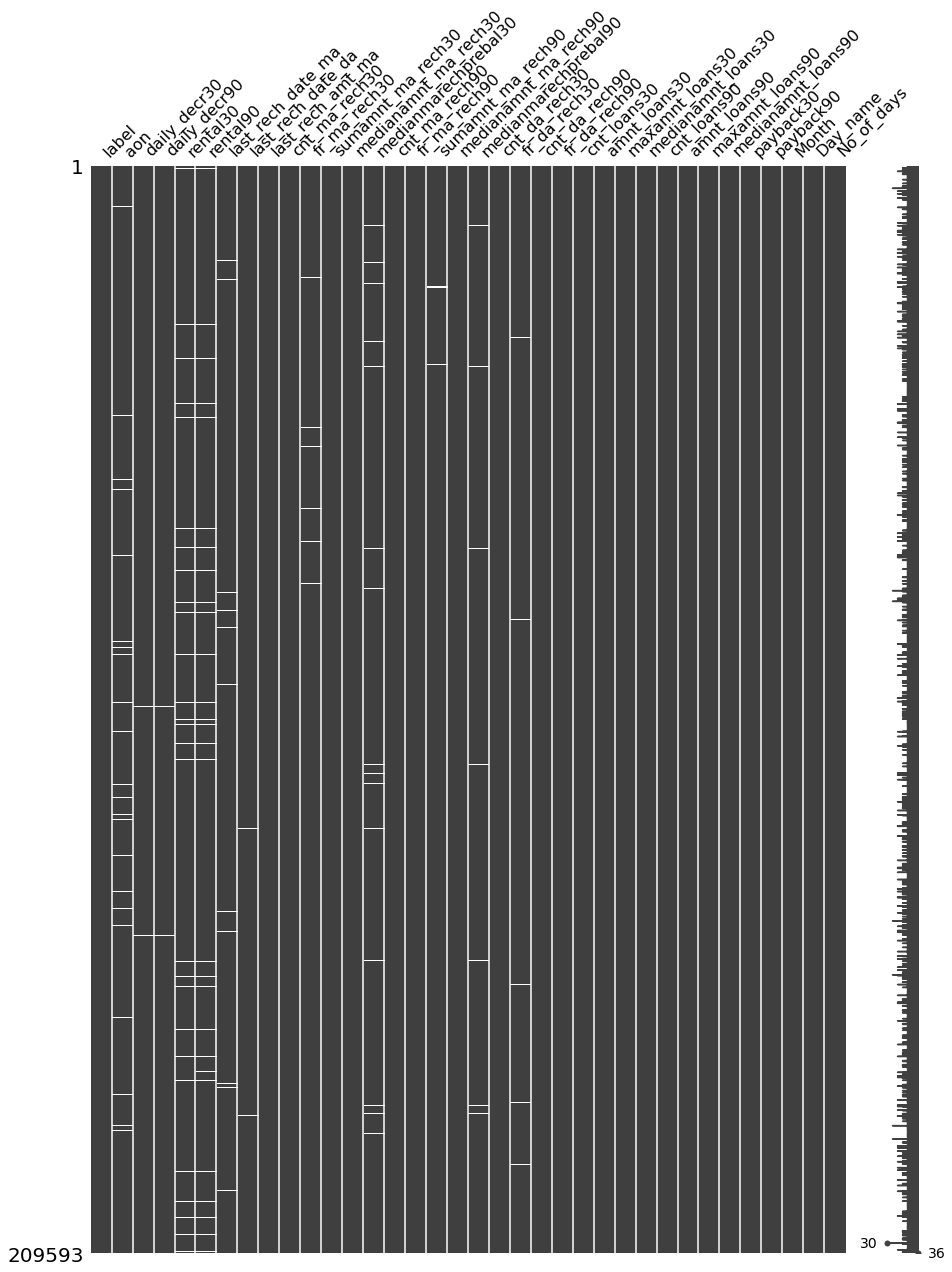

In [28]:
import missingno as msno
msno.matrix(df5, figsize=(15, 20))

<AxesSubplot:>

<Figure size 1200x1200 with 0 Axes>

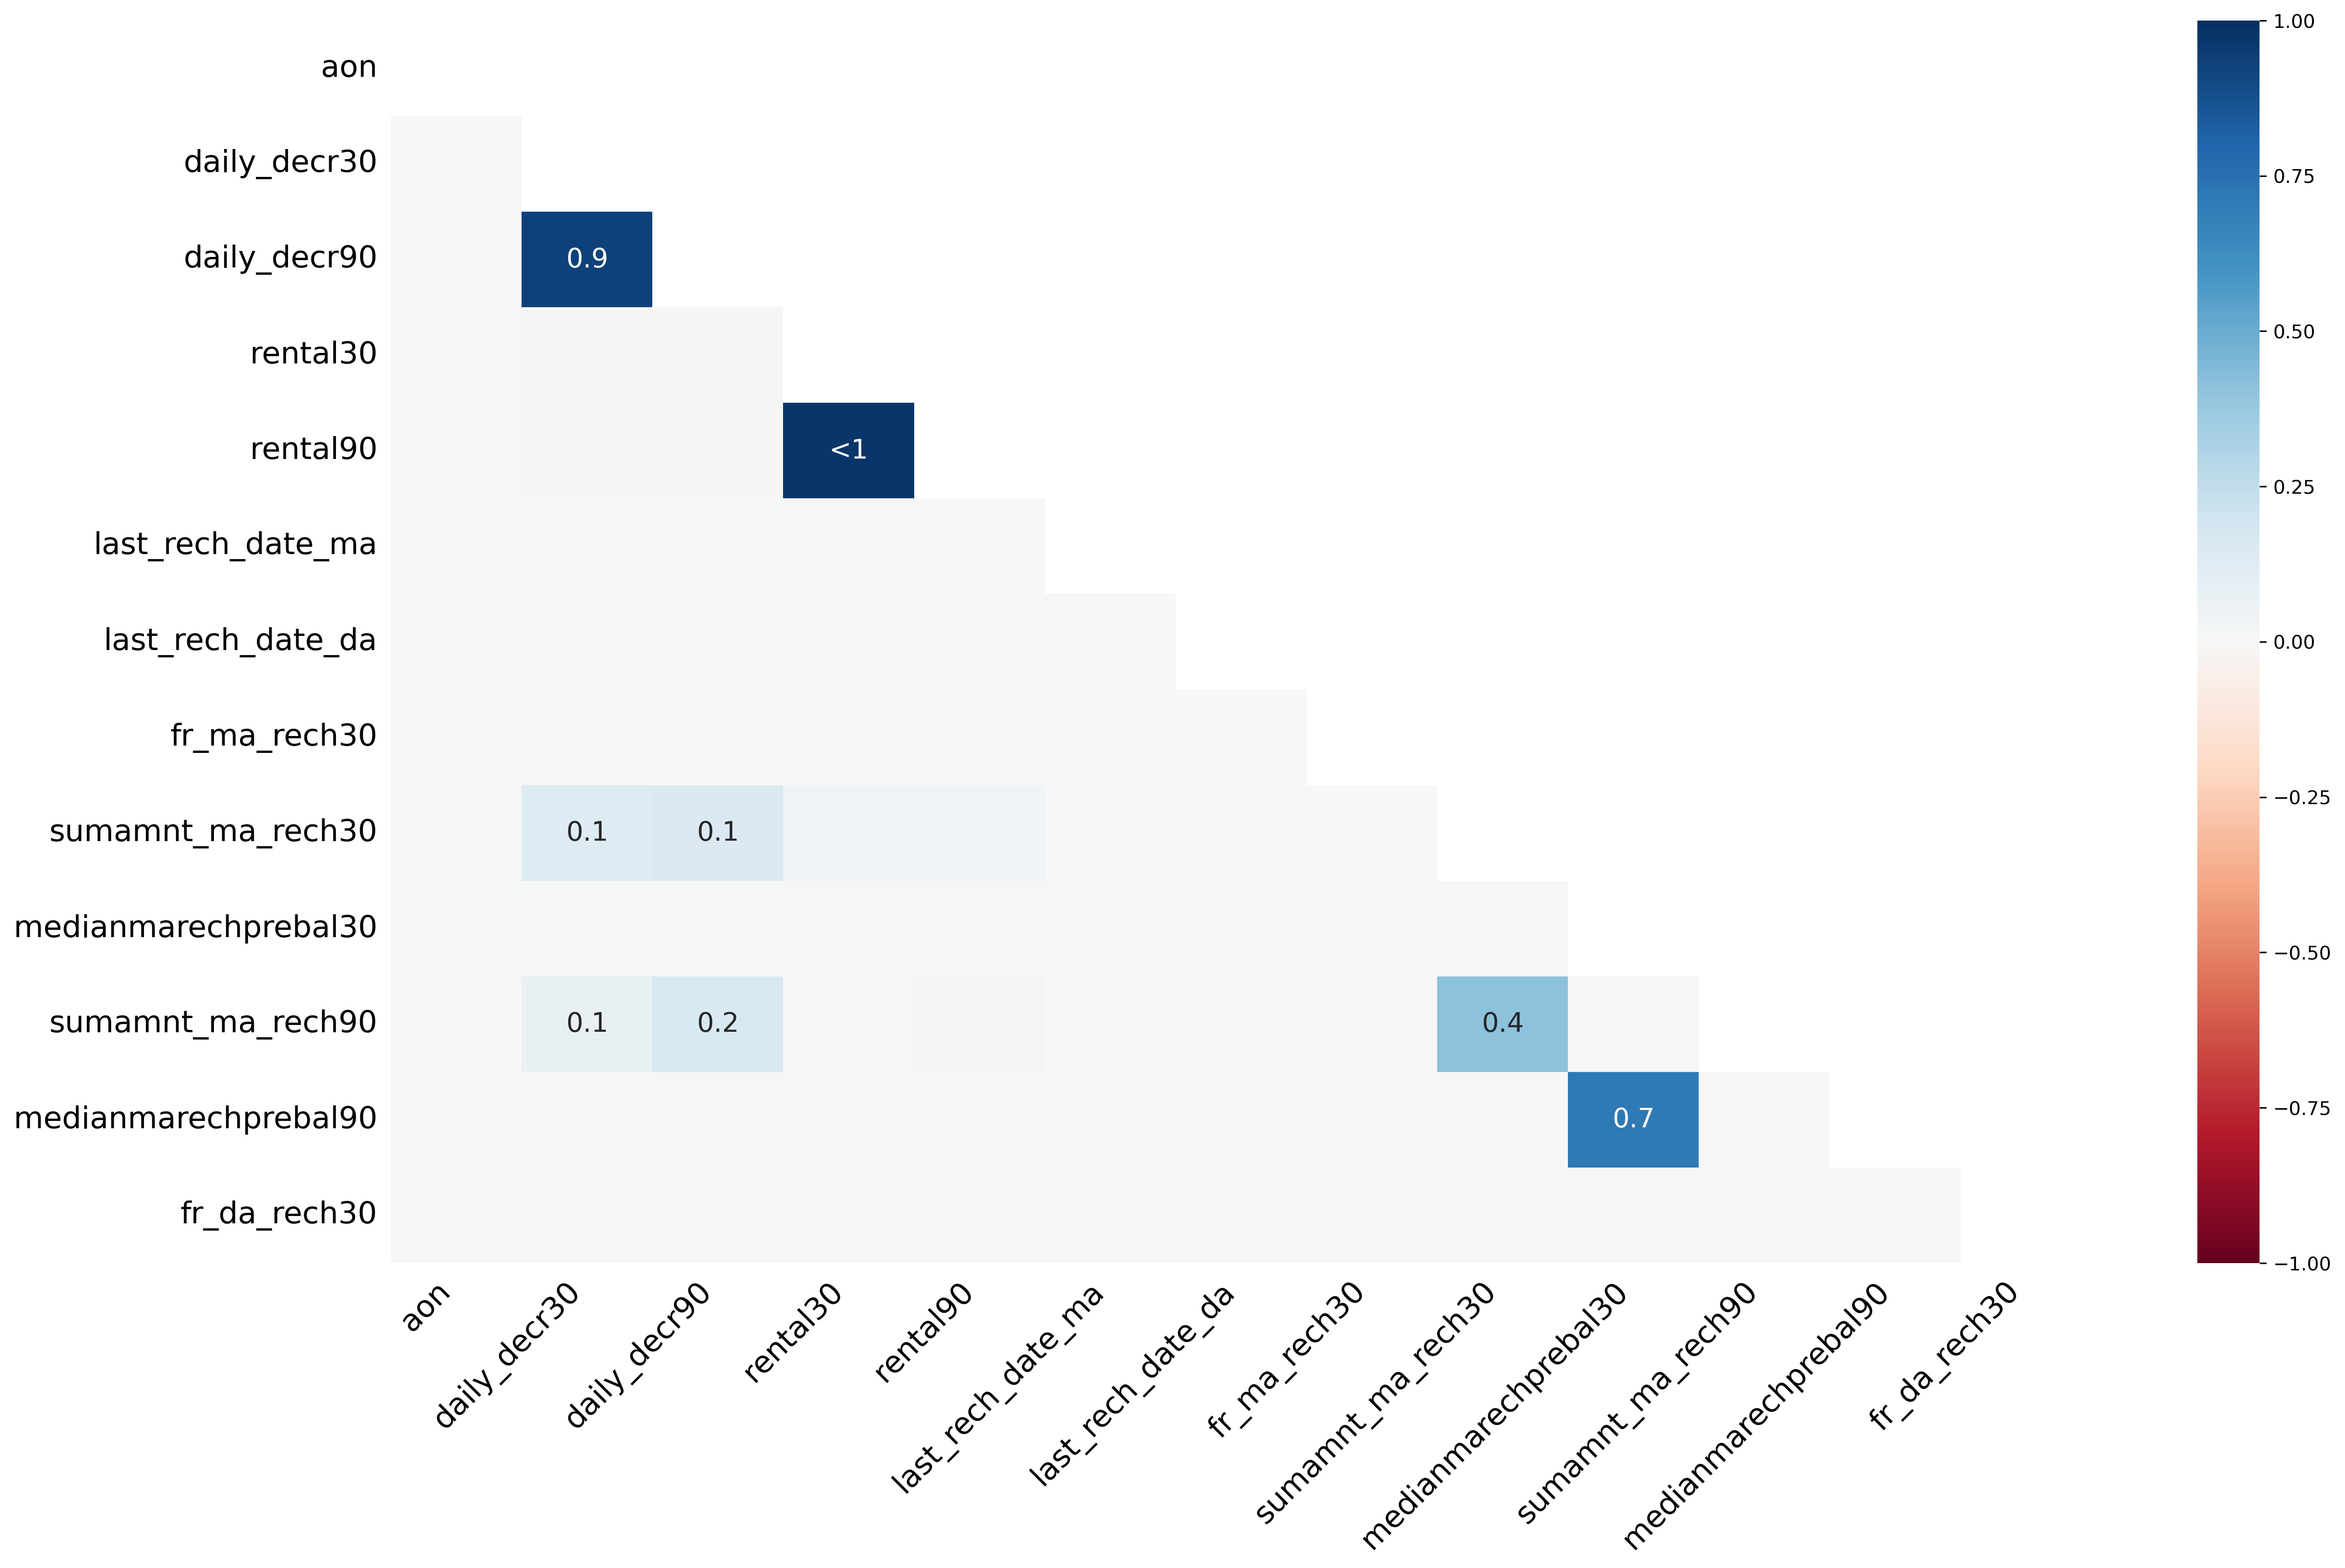

In [29]:
plt.rcParams["figure.figsize"] = [4, 4]
plt.rcParams["figure.dpi"] = 300
plt.tight_layout()
msno.heatmap(df5)

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=72)
Iterative_Imputer = imputer.fit_transform(df5.iloc[:,1:])

In [20]:
Iterative_Imputer.shape

(209593, 35)

In [21]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
KNNImputer = imputer.fit_transform(df5.iloc[:,1:])

In [22]:
KNNImputer.shape

(209593, 35)

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
simple = imputer.fit_transform(df5)
Simple_Imputer = imputer.fit_transform(df5.iloc[:,1:])

In [26]:
Simple_Imputer.shape

(209593, 35)

In [30]:
from fancyimpute import IterativeImputer
mice = IterativeImputer()
mice_imputer = mice.fit_transform(df5.iloc[:,1:])

In [32]:
df_mice_imputer = pd.DataFrame(mice_imputer)

In [33]:
df5.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Month', 'Day_name', 'No_of_days'],
      dtype='object')

In [101]:
df5.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0        3055.0        3065.0     220.0     260.0   
1      1  712.0       12122.0       12124.0    3691.0    3691.0   
2      1  535.0        1398.0        1398.0     900.0     900.0   
3      1  241.0          21.0          21.0     159.0     159.0   
4      1  947.0         150.0         150.0    1098.0    1098.0   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                   0            2            12                6   
1                   0            1            12               12   
2                   0            1             6                6   
3                   0            2            12                6   
4                   0            7            42                6   

   medianamnt_loans90  payback30  payback90  Month  Day_name  No_of_days  
0                   0         29         29      1         6          49  
1                   0          0          0      0         6          70  
2                   0          0          0      0         0          79  
3                   0          0          0      2         1           5  
4                   0          2          2      2         6          21  

[5 rows x 36 columns]

In [102]:
df5['label'] = df['label']

In [103]:
df5.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0        3055.0        3065.0     220.0     260.0   
1      1  712.0       12122.0       12124.0    3691.0    3691.0   
2      1  535.0        1398.0        1398.0     900.0     900.0   
3      1  241.0          21.0          21.0     159.0     159.0   
4      1  947.0         150.0         150.0    1098.0    1098.0   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                   0            2            12                6   
1                   0            1            12               12   
2                   0            1             6                6   
3                   0            2            12                6   
4                   0            7            42                6   

   medianamnt_loans90  payback30  payback90  Month  Day_name  No_of_days  
0                   0         29         29      1         6          49  
1                   0          0          0      0         6          70  
2                   0          0          0      0         0          79  
3                   0          0          0      2         1           5  
4                   0          2          2      2         6          21  

[5 rows x 36 columns]

In [22]:
from fancyimpute import IterativeImputer
mice = IterativeImputer()
mice_imputer = mice.fit_transform(df5)

In [23]:
df_mice_imputer = pd.DataFrame(mice_imputer)

In [24]:
df_mice_imputer.columns =['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Month', 'Day_name', 'No_of_days']

In [25]:
[i for i in df_mice_imputer.columns if df_mice_imputer[i].isnull().sum()>0]

[]

In [26]:
df_mice_imputer.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000  0.075681      0.172167      0.171884   
aon                   0.075681  1.000000      0.054902      0.056760   
daily_decr30          0.172167  0.054902      1.000000      0.978481   
daily_decr90          0.171884  0.056760      0.978481      1.000000   
rental30              0.060813  0.067125      0.442409      0.436802   
rental90              0.078228  0.069840      0.463951      0.479318   
last_rech_date_ma    -0.092459  0.022719     -0.080326     -0.074406   
last_rech_date_da     0.024950 -0.006615      0.047265      0.048168   
last_rech_amt_ma      0.131804  0.089883      0.276175      0.265215   
cnt_ma_rech30         0.237331 -0.009177      0.449329      0.428038   
fr_ma_rech30          0.143120  0.040533      0.038567      0.041130   
sumamnt_ma_rech30     0.215109  0.037557      0.637699      0.604745   
medianamnt_ma_rech30  0.141488  0.093416      0.295503      0.283446   
medianmarechprebal30  0.050289  0.024441      0.069036      0.066932   
cnt_ma_rech90         0.236392  0.010828      0.589653      0.599900   
fr_ma_rech90          0.084385  0.032140     -0.079359     -0.081044   
sumamnt_ma_rech90     0.221128  0.057357      0.766503      0.770907   
medianamnt_ma_rech90  0.120854  0.100713      0.257631      0.250272   
medianmarechprebal90  0.037388  0.024638      0.034512      0.033551   
cnt_da_rech30         0.003827 -0.000019      0.000980      0.001036   
fr_da_rech30         -0.005748  0.006690      0.021176      0.016323   
cnt_da_rech90         0.002999  0.009490      0.039803      0.032270   
fr_da_rech90         -0.005418  0.008061      0.021290      0.017144   
cnt_loans30           0.196283  0.027418      0.368134      0.344429   
amnt_loans30          0.197272  0.029348      0.471543      0.449987   
maxamnt_loans30       0.000248 -0.001990      0.000237      0.000327   
medianamnt_loans30    0.034454  0.000759     -0.012958     -0.007421   
cnt_loans90           0.004734  0.005123      0.009347      0.009724   
amnt_loans90          0.199788  0.056894      0.568346      0.575489   
maxamnt_loans90       0.084144  0.034286      0.408457      0.408278   
medianamnt_loans90    0.028422 -0.002717     -0.031186     -0.028649   
payback30             0.043311  0.016642      0.020867      0.013552   
payback90             0.044201  0.033556      0.041361      0.035296   
Month                -0.154949 -0.063369     -0.532239     -0.558568   
Day_name              0.005668  0.003231     -0.011220     -0.012528   
No_of_days            0.162687  0.067402      0.548553      0.565341   

                      rental30  rental90  last_rech_date_ma  \
label                 0.060813  0.078228          -0.092459   
aon                   0.067125  0.069840           0.022719   
daily_decr30          0.442409  0.463951          -0.080326   
daily_decr90          0.436802  0.479318          -0.074406   
rental30              1.000000  0.954154          -0.028904   
rental90              0.954154  1.000000          -0.019348   
last_rech_date_ma    -0.028904 -0.019348           1.000000   
last_rech_date_da     0.012314  0.017407           0.026974   
last_rech_amt_ma      0.150272  0.141244           0.225035   
cnt_ma_rech30         0.237386  0.233951          -0.254552   
fr_ma_rech30          0.039966  0.044247          -0.122897   
sumamnt_ma_rech30     0.304724  0.288368          -0.171170   
medianamnt_ma_rech30  0.154545  0.140591           0.036262   
medianmarechprebal30  0.058700  0.052801           0.014115   
cnt_ma_rech90         0.314884  0.349222          -0.187014   
fr_ma_rech90         -0.031203 -0.034513           0.013729   
sumamnt_ma_rech90     0.369854  0.390114          -0.105743   
medianamnt_ma_rech90  0.134908  0.123866           0.217822   
medianmarechprebal90  0.031257  0.034013           0.089240   
cnt_da_rech30        -0.000924 -0.000253          -0.002854   
fr_da_rech30          0.056358  0.045

<AxesSubplot:>

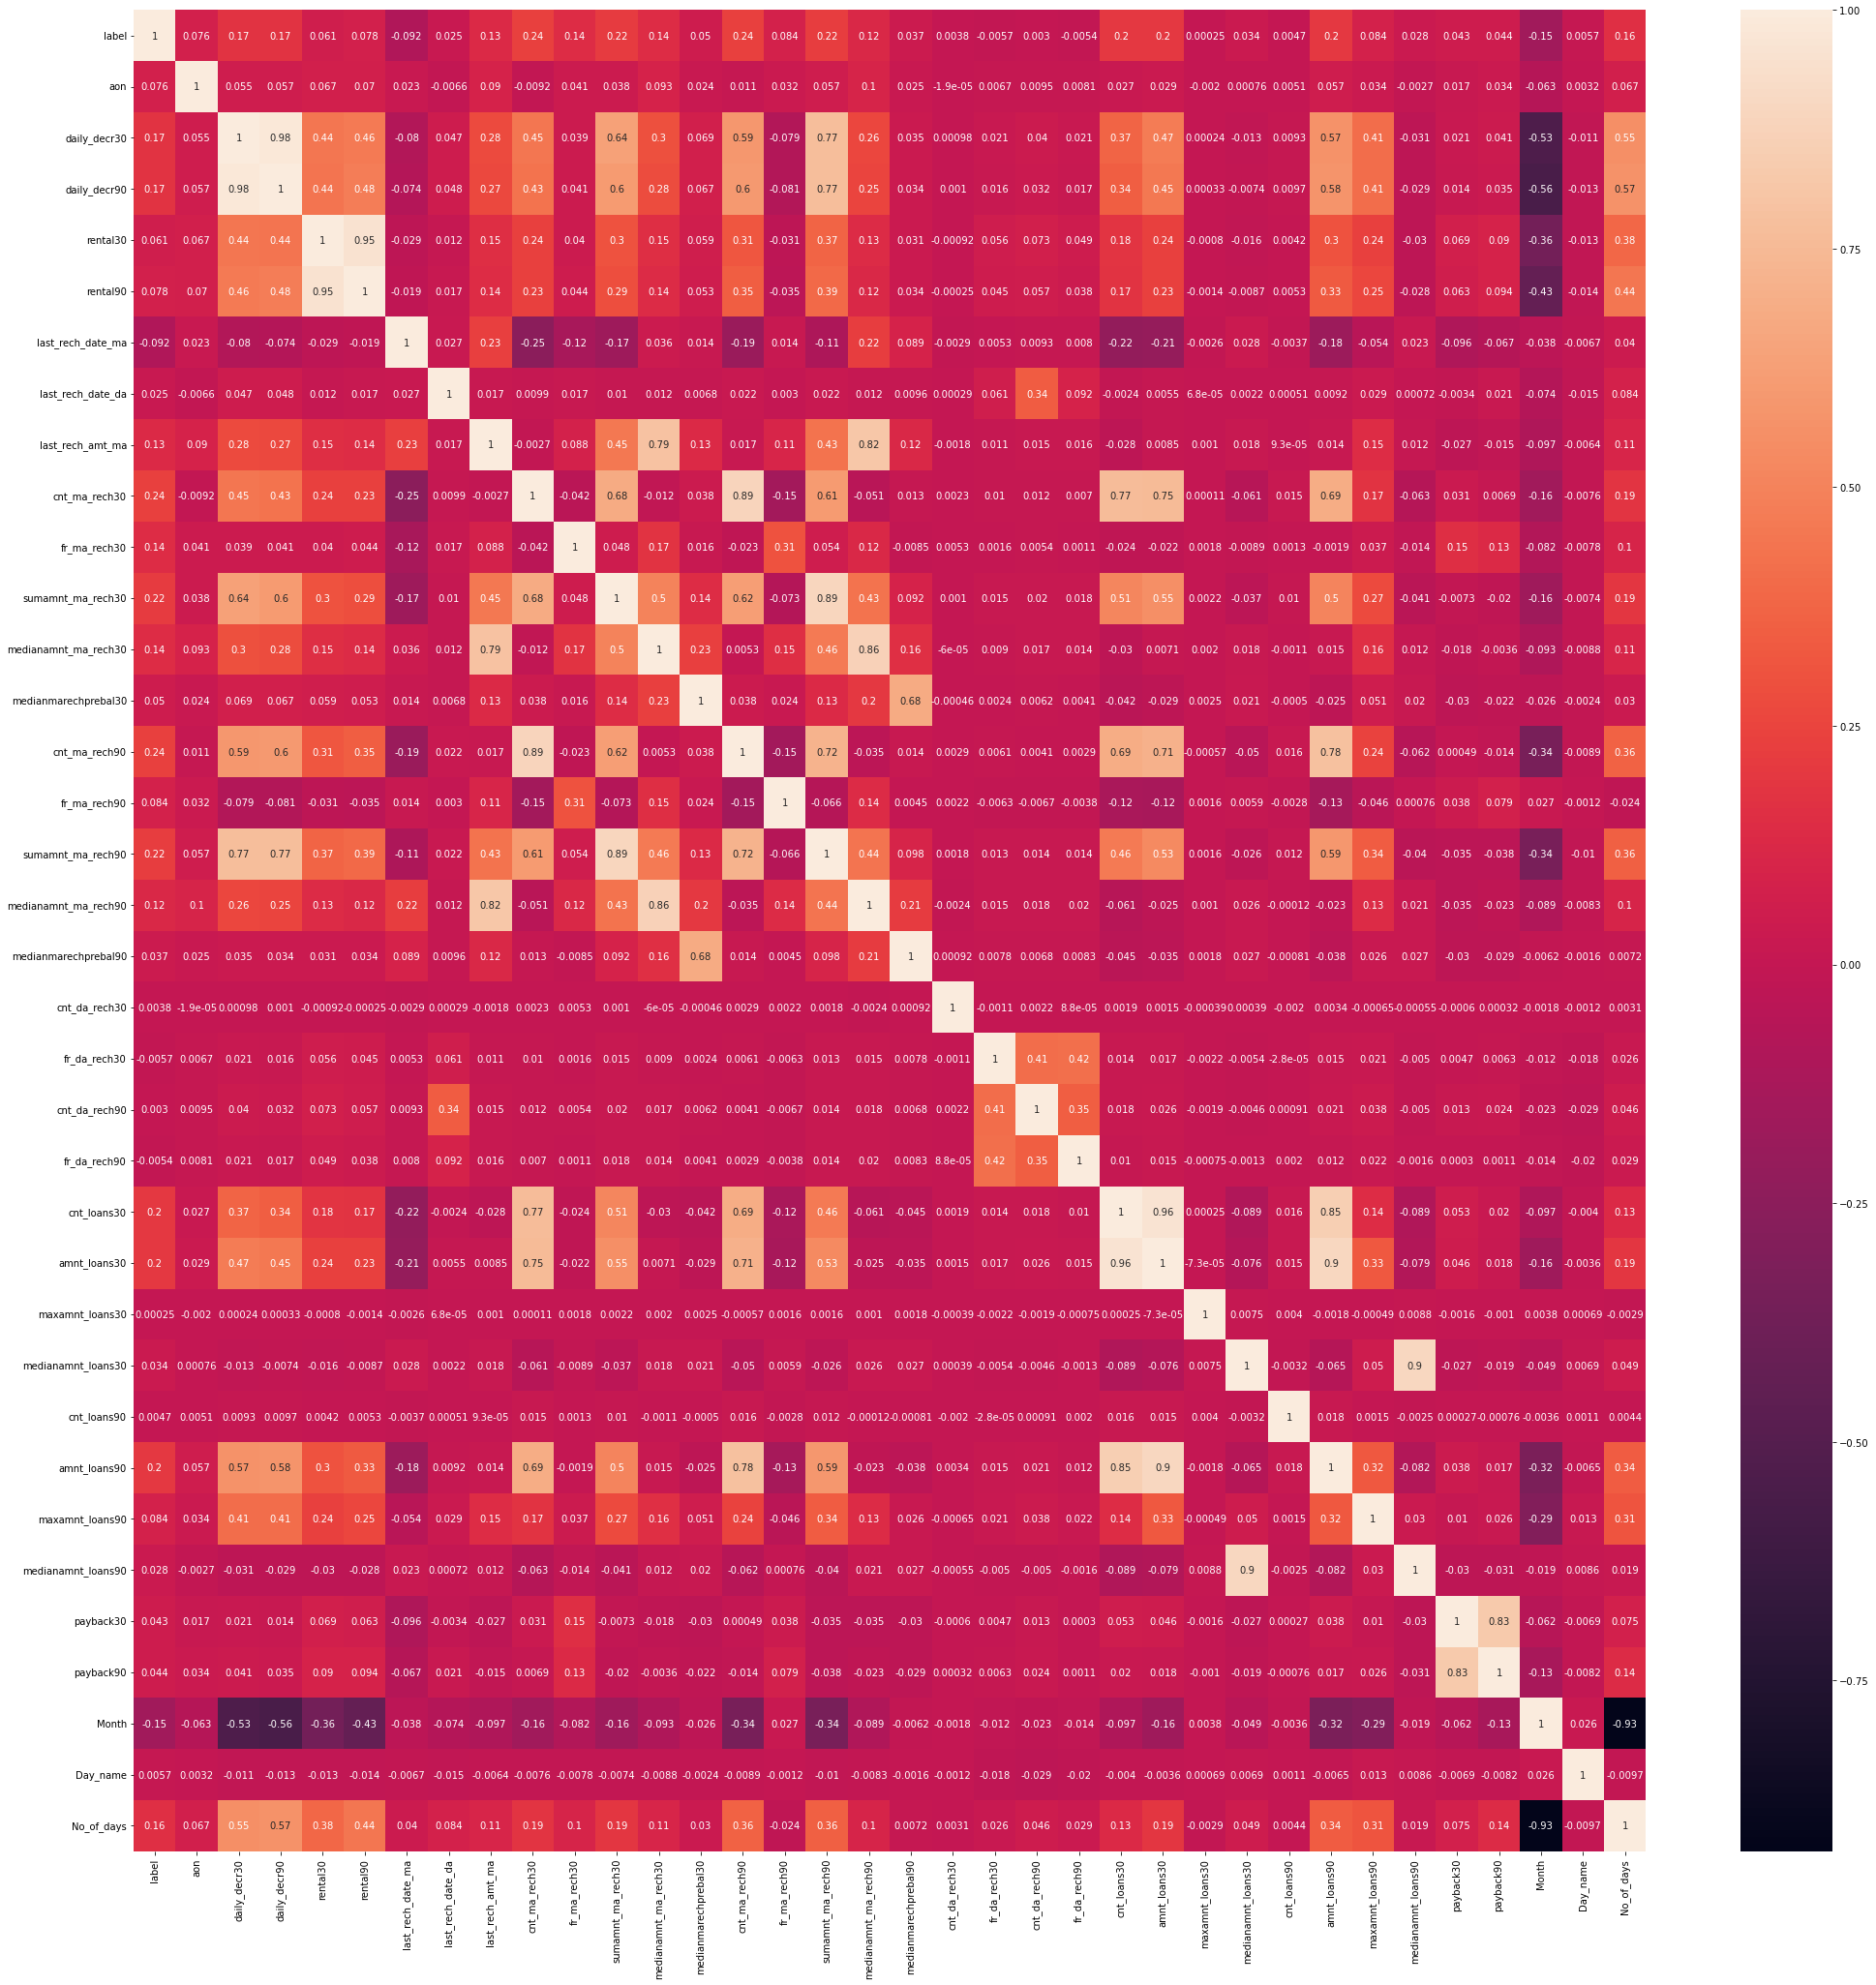

In [27]:
plt.figure(figsize=(35,35))
sns.heatmap(df_mice_imputer.corr(),annot=True)

In [28]:
for i in df_mice_imputer.columns:
    Q1,Q3 = np.percentile(df_mice_imputer[i] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df_no_outliers = df_mice_imputer[(df1[i] < lower_range) | (df_mice_imputer[i] > upper_range)]

In [29]:
df_mice_imputer.shape

(209593, 36)

In [30]:
df_no_outliers.shape

(0, 36)

In [31]:
z = np.abs(zscore(df_mice_imputer))
threshold = 3
print(np.where(z<3))
print(df_mice_imputer.shape)

(array([     0,      0,      0, ..., 209592, 209592, 209592], dtype=int64), array([ 0,  1,  2, ..., 33, 34, 35], dtype=int64))
(209593, 36)


In [32]:
df_new = df_mice_imputer[(z<3).all(axis = 1)]
df_new.shape

(155246, 36)

In [33]:
[i for i in df_new.columns if df_new[i].isnull().sum()>0]

[]

In [34]:
df_new.skew()

label                    -2.109182
aon                       0.919358
daily_decr30              1.918173
daily_decr90              2.018949
rental30                  2.196944
rental90                  2.249482
last_rech_date_ma         2.140948
last_rech_date_da        14.475258
last_rech_amt_ma          2.175185
cnt_ma_rech30             1.140997
fr_ma_rech30              1.467393
sumamnt_ma_rech30         1.557871
medianamnt_ma_rech30      2.378921
medianmarechprebal30      3.463330
cnt_ma_rech90             1.275429
fr_ma_rech90              2.050669
sumamnt_ma_rech90         1.595531
medianamnt_ma_rech90      2.441469
medianmarechprebal90      3.764217
cnt_da_rech30            49.041723
fr_da_rech30            135.072770
cnt_da_rech90            11.645703
fr_da_rech90              0.000000
cnt_loans30               1.418545
amnt_loans30              1.395785
maxamnt_loans30          53.063513
medianamnt_loans30        0.000000
cnt_loans90               1.674953
amnt_loans90        

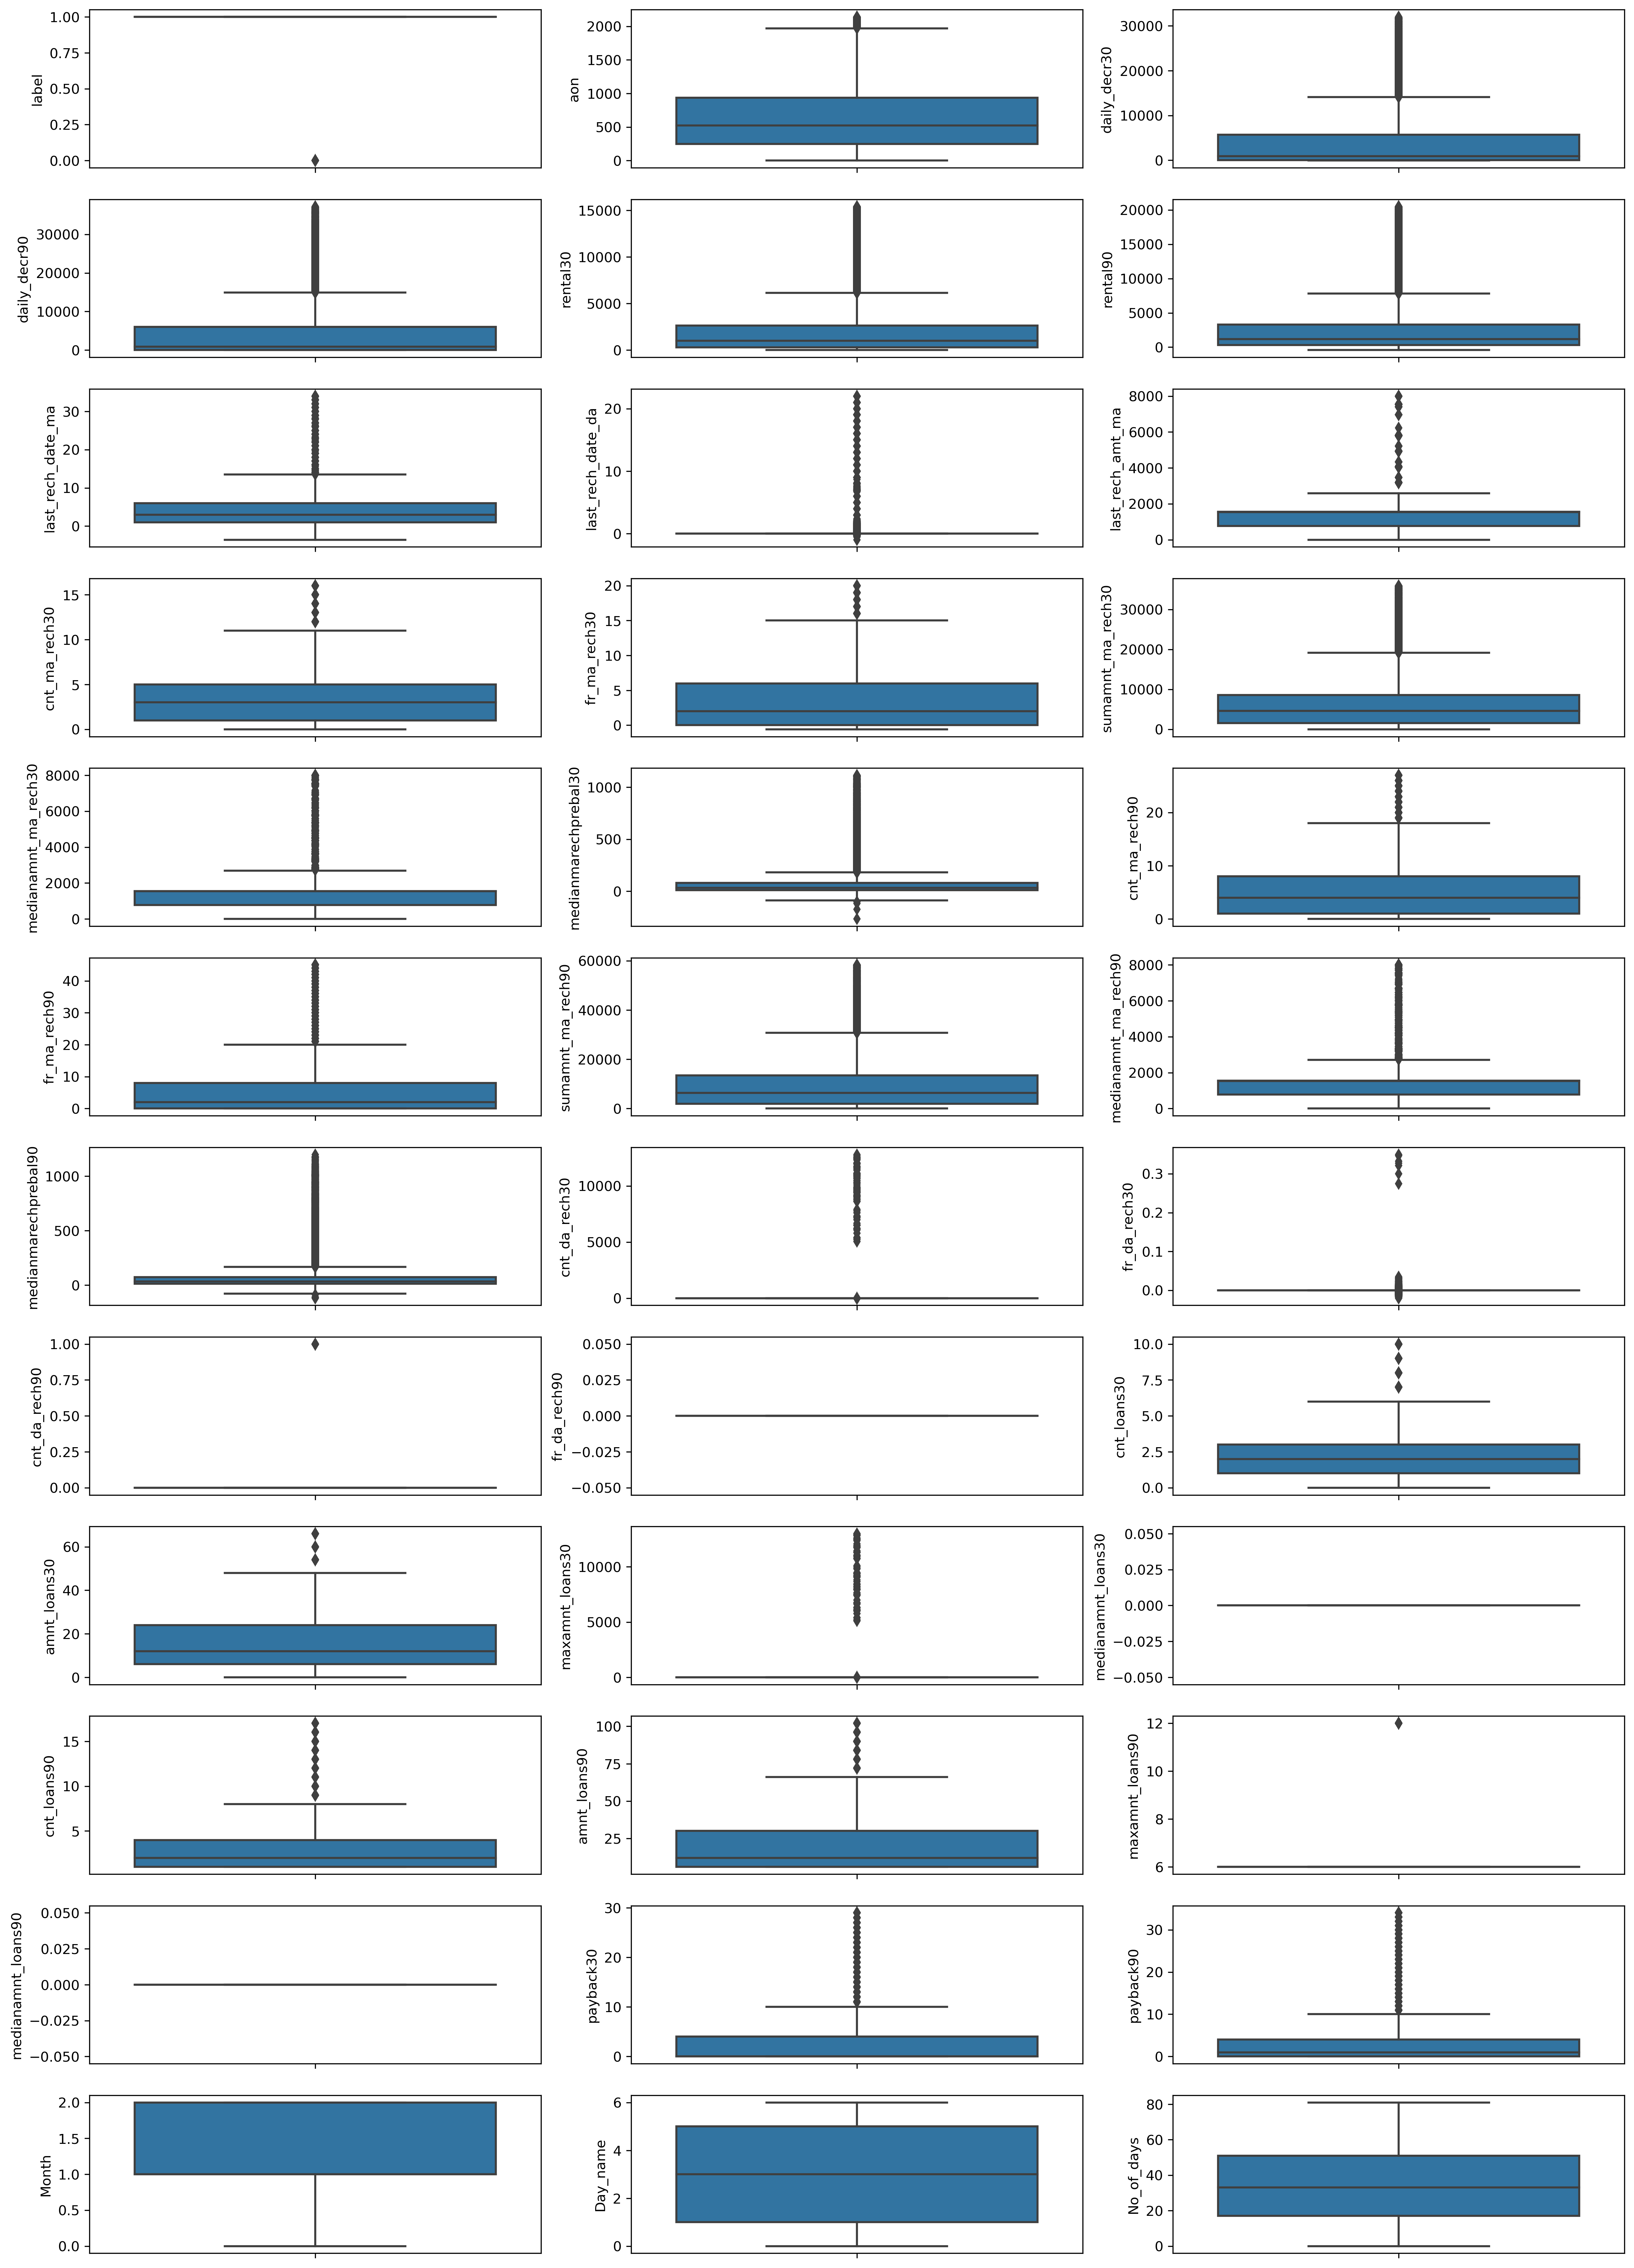

In [170]:
count=1
plt.subplots(figsize=(20, 30))
for i in df_new.columns:
    plt.subplot(12,3,count)
    sns.boxplot(y=df_new[i])
    
    count+=1

plt.show()

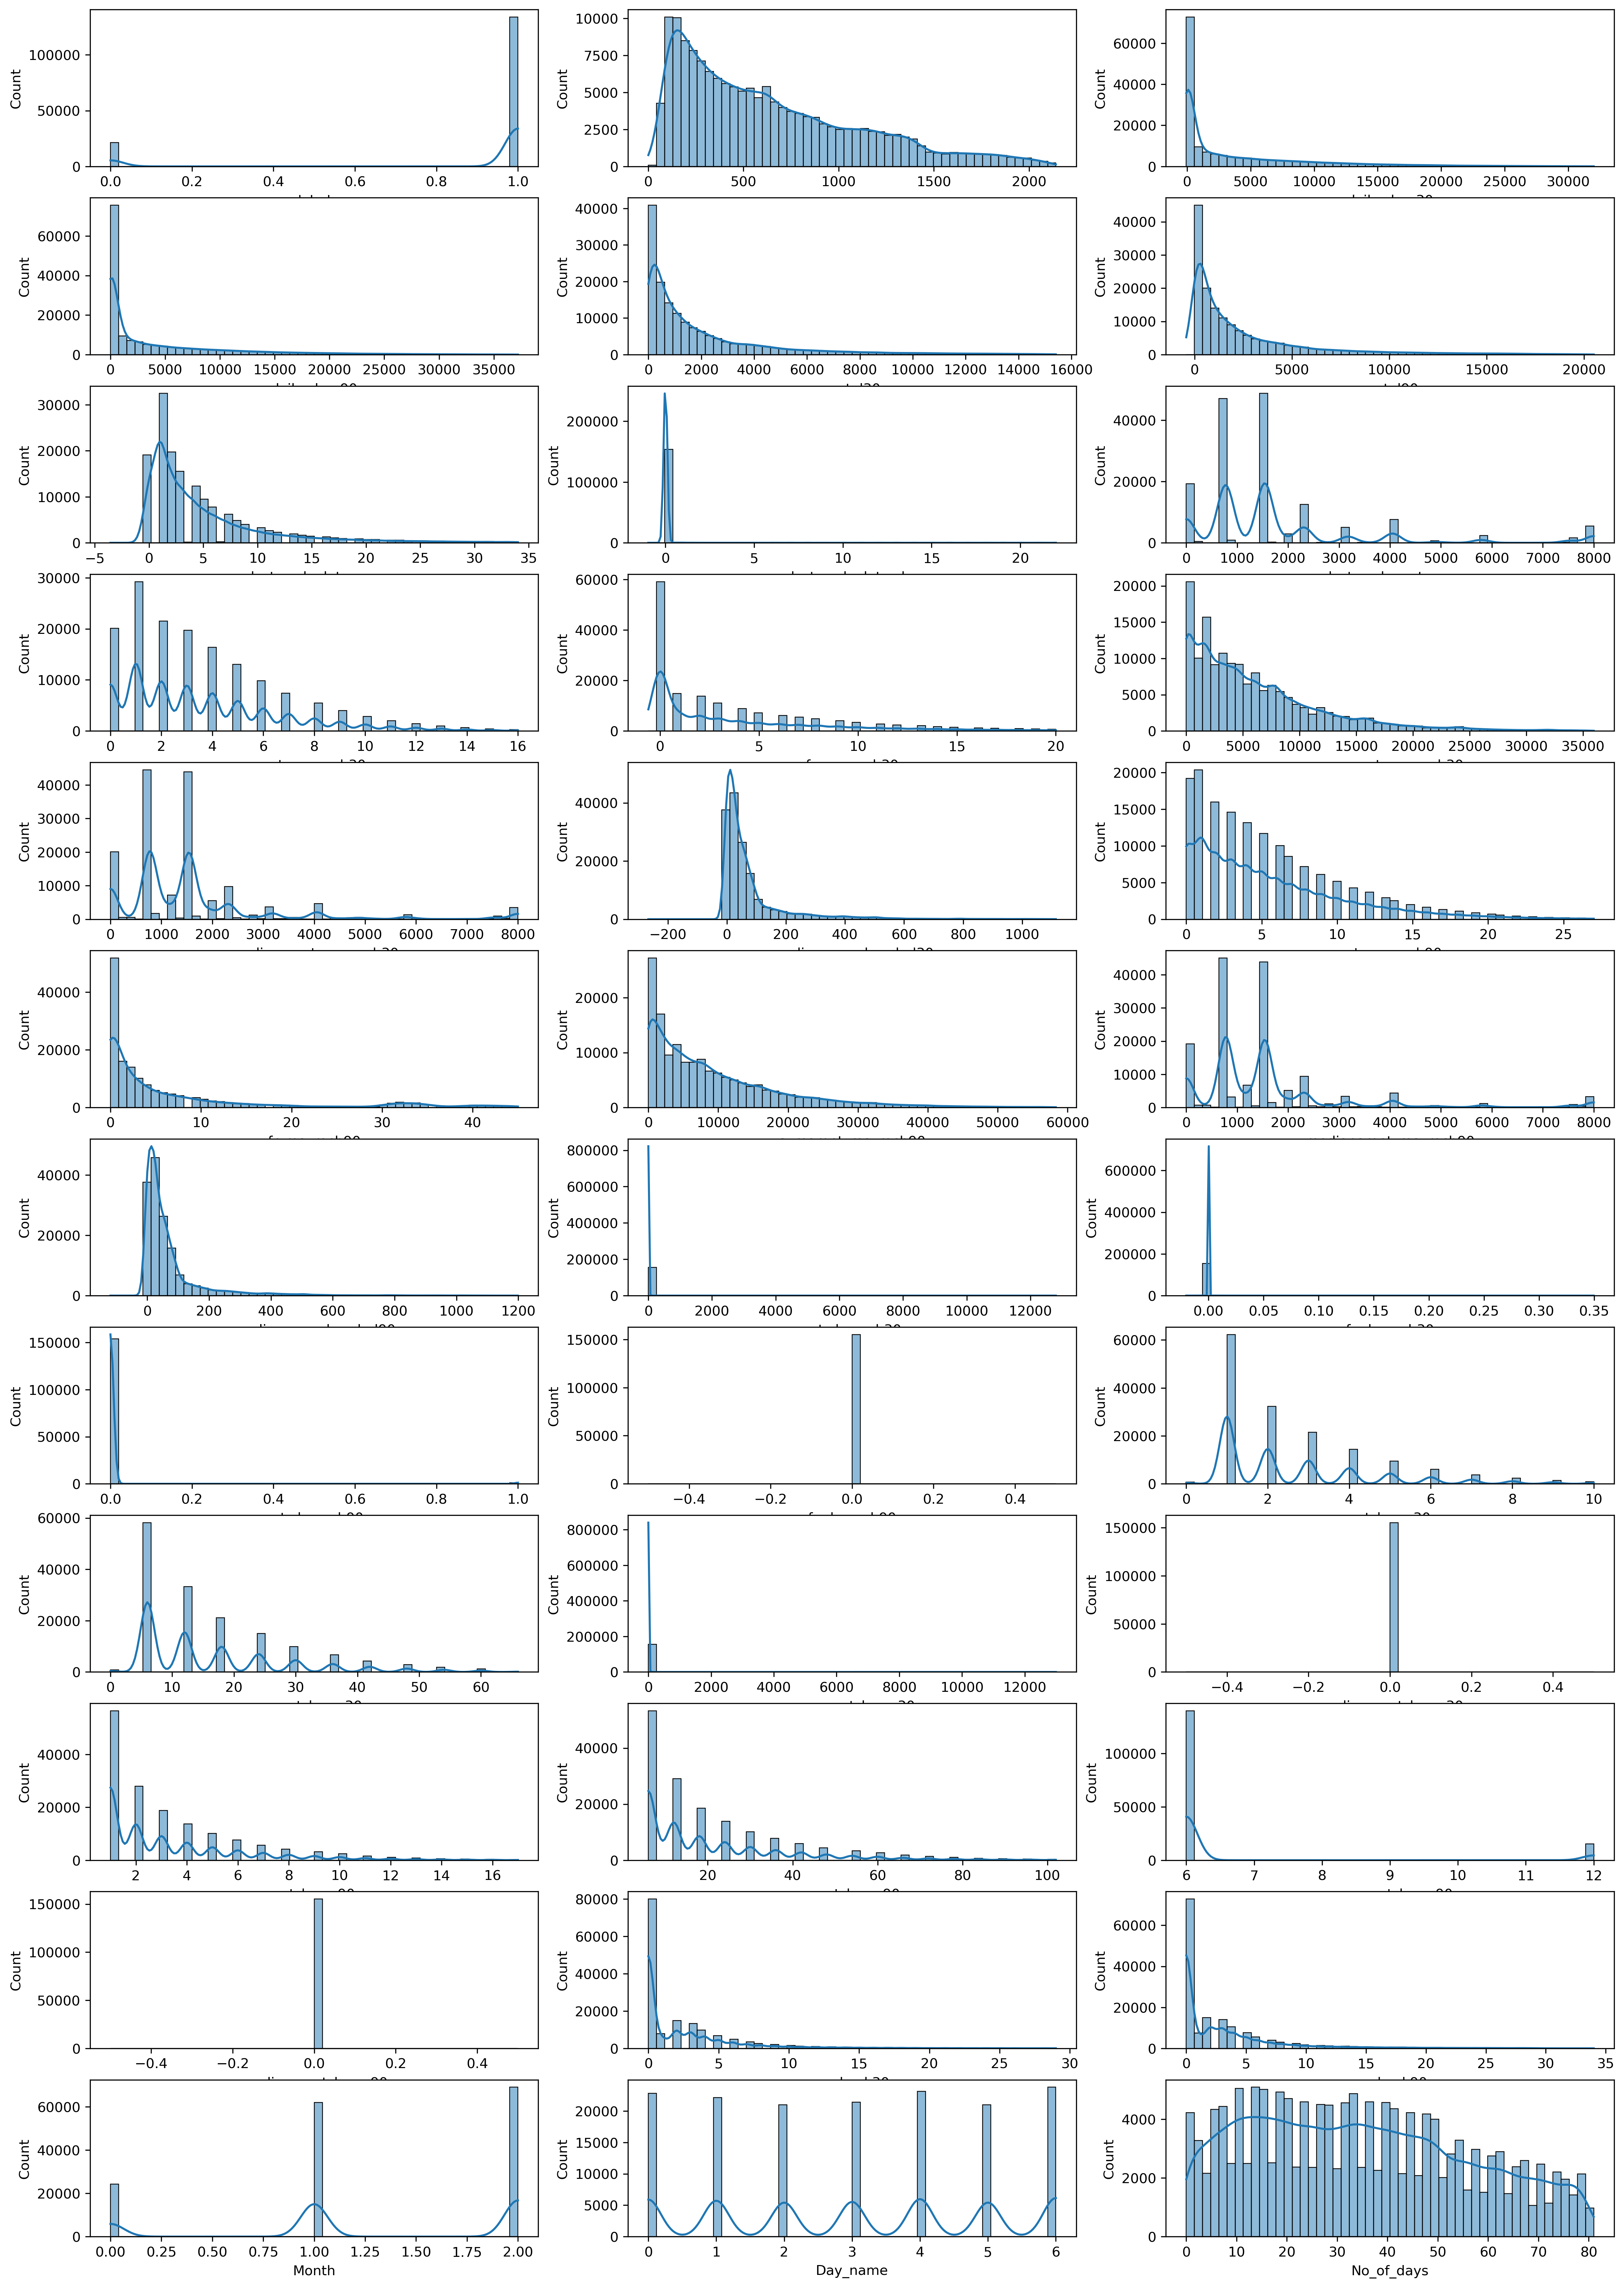

In [171]:
count=1
plt.subplots(figsize=(20, 30))
for i in df_new.columns:
    plt.subplot(12,3,count)
    sns.histplot(df_new[i], kde = True, bins = 50, label = df_new.skew())
    
    count+=1

plt.show()

In [35]:
X = df_new.drop(['label'],axis=1)
y = df_new['label']

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [38]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)

In [39]:
ROS.fit(X,y)

RandomOverSampler(random_state=42)

In [40]:
X_ros, Y_ros= ROS.fit_resample(X, y)

In [41]:
Y_ros.value_counts(normalize=True)

1.0    0.5
0.0    0.5
Name: label, dtype: float64

In [42]:
[i for i in df_new.columns if df_new[i].isnull().sum()>0]

[]

In [180]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 72,test_size = 0.33)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8670557464084947


In [46]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [47]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression(),GaussianNB(),KNeighborsClassifier(n_neighbors=3)]
max_accuracy_score = 0
for r_state in range(40,45):
    X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.9516554119017725
accuracy score correspond to random state  40 is 0.856628999966066
accuracy score correspond to random state  40 is 0.7727442397095252
accuracy score correspond to random state  40 is 0.7263904441955954
accuracy score correspond to random state  40 is 0.8885382379223364
accuracy score correspond to random state  41 is 0.9517006571877793
accuracy score correspond to random state  41 is 0.8569457169681134
accuracy score correspond to random state  41 is 0.7737283246801724
accuracy score correspond to random state  41 is 0.7238114628932099
accuracy score correspond to random state  41 is 0.8901557568970783
accuracy score correspond to random state  42 is 0.9526168742294162
accuracy score correspond to random state  42 is 0.8541178865926906
accuracy score correspond to random state  42 is 0.7698824753695974
accuracy score correspond to random state  42 is 0.7233929439976472
accuracy score correspond to random state  42 is 

In [48]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [49]:
dec = DecisionTreeClassifier(random_state=44)
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [50]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=44), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [51]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=44)

In [52]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [53]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=20, min_samples_leaf=5, random_state=44)
DTC.fit(X_train,y_train)
predc = DTC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 91.39887113011413


In [54]:
pred_prob = DTC.predict_proba(X_test)[:,1]

In [55]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label=True)

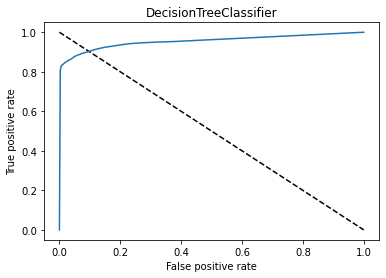

In [56]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

In [57]:
confusion_matrix(y_test, predc)

array([[42215,  2126],
       [ 5478, 38588]], dtype=int64)

In [60]:
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)
pred = RFR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 89.53744278905123


In [61]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.06878394406319764
Mean squared Error:  0.02615613994031525
Root Mean Absolute Error:  0.26226693284361574


Text(0, 0.5, 'Predicted_Y')

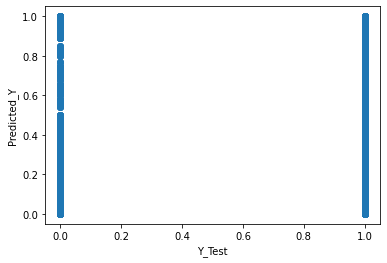

In [62]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

<AxesSubplot:>

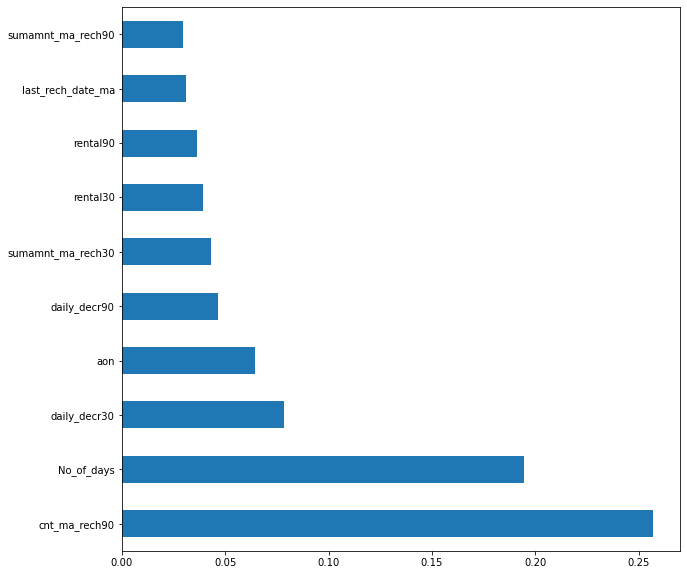

In [63]:
plt.figure(figsize=(10,10))
feat_importances = pd.Series(RFR.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [64]:
from sklearn.pipeline import Pipeline,make_pipeline
pipeline_dtc=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=5)),
                     ('dtc',DecisionTreeClassifier())])

In [65]:
pipeline_knn=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=5)),
                     ('knn',KNeighborsClassifier())])

In [66]:
pipelines = [pipeline_dtc, pipeline_knn]

In [67]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [68]:
pipe_dict = {0: 'DecisionTreeClassifier',1:'KNeighborsClassifier'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [71]:
pred = pipe.predict(X_test)
acurracy_score = accuracy_score(y_test,pred)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 84.82925560193198
